# MO444A - PROJETO 3

Alunas:
*   Maria Tejada Begazo (RA 197488)
*   Nayara Ferreira da Silva (RA 223804)

# PART I - CODIGO

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0

%cd search

/home/mtejada/Desktop/PacamanML/197488_/search


## ALGORITMO GENETICO


Nós modelamos nosso algoritmo genetico esta modelado em que temos 4 opções básica determinadas por um if-then-else.
Onde nossos terminaies estão determinados por:

* d1: distancia entre o fantasma mas cercano. 
* d2: distancia entre la pildora mas cercana. 
* a1: escapar de un fantasma
* a2: ir a comer una pildora cercana
* a3: movimiento aleatorio. 

Ademáis vimos la opção de só ter como recompensa o score médio de 3 jogos seguidos. 
Nosso individuos estão formado por 8 parametros, por exemplo:

    [op, d1, d2, dist1, dist2, a1, a2, a3]

onde op se refiere à opção que pode ser de 1 à 4, depois d1 e d2 que se informo na parte de em cima, dist1 e dist2 podem estar no rango de 1 à 5 e a1, a2, a3 que se refierem às ações. 

Nosso crossver em dois pontos:

    parent1 =[1,| d1, d2, 3, 4, | a1, a2, a3]    => child1 =[1,| d2, d1, 1, 2, | a1, a2, a3] 
    
    parent2 =[3,| d2, d1, 1, 2, | a3, a2, a1]    => child2 =[3,| d1, d2, 3, 4, | a3, a2, a1]
    
A mutação esta determinado nos pontos que são enteiros, onde trocara o número de forma aleatoria. 


In [2]:
def initialization_of_population(size):
    op = [1, 2, 3, 4]
    d  = ['d1', 'd2']
    dis= [1, 2, 3, 4]
    a  = ['a1', 'a2', 'a3']
    
    popul = []
    for i in range(size):
        indiv = list(np.ones(len(op) + len(d) + len(dis) + len(a)))
        random.shuffle(op)
        random.shuffle(d)
        random.shuffle(dis)
        random.shuffle(a)
        indiv[0] = op[0]
        indiv[1:3] = d
        indiv[3] = dis[0]
        random.shuffle(dis)
        indiv[4] = dis[0]
        indiv[5:] = a
        popul.append(indiv.copy())
    return popul
        

In [3]:
def crossover_twopoints(parent1, parent2, PROBABILITY_CROSSOVER):
    child1 = parent1.copy()
    child2 = parent2.copy()
    probability = np.random.uniform(0,1)
    
    if probability < PROBABILITY_CROSSOVER:
        for i in range(1,5):
            child1[i] = parent2[i]
            child2[i] = parent1[i]
    return child1, child2

def mutation_point(indiv, PROBABILITY_MUTATION):
    index_mut = [0, 3, 4]
    random.shuffle(index_mut)
    probability = np.random.uniform(0,1)
    
    if probability < PROBABILITY_MUTATION:
        indiv[index_mut[0]] = random.randint(1,4)
    return indiv


In [4]:
def selection_tournament(population, scores):
    indx1 = random.randint(0, len(population)-1)
    indx2 = random.randint(0, len(population)-1)
    
    if scores[indx1] < scores[indx2]:
        return population[indx2]
    else:
        return population[indx1]

In [5]:
def algorithmGenetic(Environment, size, iteration, PROBABILITY_CROSSOVER, PROBABILITY_MUTATION):
    pop = initialization_of_population(size)
    
    nameFile = "GAindividual.txt"
    nameFileGeneration = "GAGeneration.txt"
    nameFileData = "GAData.txt"
    score_aver = []
    score_best = []
    score_pior = []
    
    dataFile = open(nameFileData, 'w')
    generationFile = open(nameFileGeneration, 'w')
    dataFile.write("Avr_better,Avr,Avr_pior\n")
    
    for i in range(iteration):
        score = []
        best_score = -99999
        best_Indx_indiv = 0
        
        for j in range(size):
            generationFile.write(str(i) + ",")
            for k in range(len(pop[j])):
                generationFile.write(str(pop[j][k]) + ",")
                
            with open(nameFile, 'w') as f:
                f.write(str(pop[j]))
                f.write("\n")
            
            p = ['layout:  smallClassic', 'Pacman died! Score: -482', 'Pacman died! Score: -412', 'Pacman died! Score: -410', 'Average Score: -434.6666666666667']
            if Environment == 0:
                p = !python3 pacman.py -n 3 -l smallClassic -p GAagents --agentArgs "tableMode=Small,f=GAindividual.txt"
            elif Environment == 1:
                p = !python3 pacman.py -n 3 -l mediumClassic -p GAagents --agentArgs "tableMode=Medium,f=GAindividual.txt"
            else:
                p = !python3 pacman.py -n 3 -l originalClassic -p GAagents --agentArgs "tableMode=Original,f=GAindividual.txt"
            
            print(p)
            score.append(int(float(p[4].split(' ')[2])))
            
            if(score[j]  > best_score):
                best_score = score[j]
                best_Indx_indiv = j
            
            generationFile.write(str(score[j]))
            generationFile.write('\n')
            generationFile.flush()
        
        q = pop.copy()
        indx = 0
        for j in range(int(size/2)):
            mom = selection_tournament(pop, score)
            dad = selection_tournament(pop, score)
            child1, child2 = crossover_twopoints(mom, dad, PROBABILITY_CROSSOVER)
            q[indx] = mutation_point(child1, PROBABILITY_MUTATION)
            q[indx+1] = child2
            indx+=2
        
        score_best.append(max(score))
        score_aver.append(sum(score)/size)
        score_pior.append(min(score))
        
        dataFile.write(str(max(score)) + "," + str(sum(score)/size) + "," + str(min(score)) + "\n")
        dataFile.flush()
        
        print(score_best, score_aver, score_pior)
        q[0] = pop[best_Indx_indiv]
        pop = q
    
    return pop[0],score_aver, score_best, score_pior


### Small Classic

Nós fizemos um aprendiçado com o mapa smallClassic (opcão 0) que tem 2 fantasmas, em cada geração temos 25 individuos e só aprendemos 50 gerações como uma probabilidade de crossover de 0.70 e mutação de 0.20. Internamente se faz 3 iterações por cada individuos e obtemos a media do score. Nosso fitness esta definido pelo score dado do jogo.

In [7]:
bestInd, score_aver, score_best, score_pior = algorithmGenetic(0, 25,50, 0.70, 0.20 )

['layout:  smallClassic', 'Pacman died! Score: -420', 'Pacman died! Score: -472', 'Pacman died! Score: -329', 'Average Score: -407.0', 'Scores:        -420.0, -472.0, -329.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -448', 'Pacman died! Score: -497', 'Pacman died! Score: -437', 'Average Score: -460.6666666666667', 'Scores:        -448.0, -497.0, -437.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -360', 'Pacman died! Score: -356', 'Pacman died! Score: -366', 'Average Score: -360.6666666666667', 'Scores:        -360.0, -356.0, -366.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -459', 'Pacman died! Score: -9', 'Pacman died! Score: -511', 'Average Score: -326.3333333333333', 'Scores:        -459.0, -9.0, -511.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout

['layout:  smallClassic', 'Pacman died! Score: -419', 'Pacman died! Score: -454', 'Pacman died! Score: -459', 'Average Score: -444.0', 'Scores:        -419.0, -454.0, -459.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -481', 'Pacman died! Score: -431', 'Pacman died! Score: -445', 'Average Score: -452.3333333333333', 'Scores:        -481.0, -431.0, -445.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -88', 'Pacman died! Score: -388', 'Pacman died! Score: -222', 'Average Score: -232.66666666666666', 'Scores:        -88.0, -388.0, -222.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -461', 'Pacman died! Score: -490', 'Pacman died! Score: -495', 'Average Score: -482.0', 'Scores:        -461.0, -490.0, -495.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallC

['layout:  smallClassic', 'Pacman died! Score: -431', 'Pacman died! Score: -612', 'Pacman died! Score: -457', 'Average Score: -500.0', 'Scores:        -431.0, -612.0, -457.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -193', 'Pacman died! Score: -350', 'Pacman died! Score: -367', 'Average Score: -303.3333333333333', 'Scores:        -193.0, -350.0, -367.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -450', 'Pacman died! Score: -429', 'Pacman died! Score: -402', 'Average Score: -427.0', 'Scores:        -450.0, -429.0, -402.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -75', 'Pacman died! Score: -335', 'Pacman died! Score: -336', 'Average Score: -248.66666666666666', 'Scores:        -75.0, -335.0, -336.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallC

['layout:  smallClassic', 'Pacman died! Score: -357', 'Pacman died! Score: -385', 'Pacman died! Score: -329', 'Average Score: -357.0', 'Scores:        -357.0, -385.0, -329.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
[70, 136, -198, 128] [-382.08, -358.64, -347.52, -289.08] [-498, -483, -507, -445]
['layout:  smallClassic', 'Pacman died! Score: -376', 'Pacman died! Score: -339', 'Pacman died! Score: -130', 'Average Score: -281.6666666666667', 'Scores:        -376.0, -339.0, -130.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -148', 'Pacman died! Score: -377', 'Pacman died! Score: -335', 'Average Score: -286.6666666666667', 'Scores:        -148.0, -377.0, -335.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -520', 'Pacman died! Score: -377', 'Pacman died! Score: -358', 'Average Score: -418.3333333333333', 'Scores:        -520.0, -3

['layout:  smallClassic', 'Pacman died! Score: -339', 'Pacman died! Score: -340', 'Pacman died! Score: -407', 'Average Score: -362.0', 'Scores:        -339.0, -340.0, -407.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -687', 'Pacman died! Score: -172', 'Pacman died! Score: -145', 'Average Score: -334.6666666666667', 'Scores:        -687.0, -172.0, -145.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -135', 'Pacman died! Score: -451', 'Pacman died! Score: -334', 'Average Score: -306.6666666666667', 'Scores:        -135.0, -451.0, -334.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -351', 'Pacman died! Score: -411', 'Pacman died! Score: -353', 'Average Score: -371.6666666666667', 'Scores:        -351.0, -411.0, -353.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['la

['layout:  smallClassic', 'Pacman died! Score: -197', 'Pacman died! Score: -397', 'Pacman died! Score: -410', 'Average Score: -334.6666666666667', 'Scores:        -197.0, -397.0, -410.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -344', 'Pacman died! Score: -371', 'Pacman died! Score: -347', 'Average Score: -354.0', 'Scores:        -344.0, -371.0, -347.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -349', 'Pacman died! Score: -351', 'Pacman emerges victorious! Score: 871', 'Average Score: 57.0', 'Scores:        -349.0, -351.0, 871.0', 'Win Rate:      1/3 (0.33)', 'Record:        Loss, Loss, Win']
['layout:  smallClassic', 'Pacman died! Score: -384', 'Pacman died! Score: -347', 'Pacman died! Score: -412', 'Average Score: -381.0', 'Scores:        -384.0, -347.0, -412.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallCla

['layout:  smallClassic', 'Pacman died! Score: -295', 'Pacman died! Score: -358', 'Pacman died! Score: -166', 'Average Score: -273.0', 'Scores:        -295.0, -358.0, -166.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -139', 'Pacman died! Score: -342', 'Pacman died! Score: -347', 'Average Score: -276.0', 'Scores:        -139.0, -342.0, -347.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
[70, 136, -198, 128, -130, -145, 57, 87] [-382.08, -358.64, -347.52, -289.08, -285.04, -320.12, -291.76, -280.84] [-498, -483, -507, -445, -418, -453, -425, -386]
['layout:  smallClassic', 'Pacman died! Score: -369', 'Pacman died! Score: -323', 'Pacman died! Score: -377', 'Average Score: -356.3333333333333', 'Scores:        -369.0, -323.0, -377.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -473', 'Pacman died! Score: -343', 'Pacman died! Score: -3

['layout:  smallClassic', 'Pacman died! Score: -343', 'Pacman died! Score: -378', 'Pacman died! Score: -287', 'Average Score: -336.0', 'Scores:        -343.0, -378.0, -287.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -341', 'Pacman died! Score: -297', 'Pacman died! Score: -350', 'Average Score: -329.3333333333333', 'Scores:        -341.0, -297.0, -350.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -335', 'Pacman died! Score: -311', 'Pacman died! Score: -336', 'Average Score: -327.3333333333333', 'Scores:        -335.0, -311.0, -336.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -313', 'Pacman died! Score: -113', 'Pacman died! Score: -313', 'Average Score: -246.33333333333334', 'Scores:        -313.0, -113.0, -313.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['l

['layout:  smallClassic', 'Pacman died! Score: -320', 'Pacman died! Score: -190', 'Pacman died! Score: -257', 'Average Score: -255.66666666666666', 'Scores:        -320.0, -190.0, -257.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -163', 'Pacman died! Score: -382', 'Pacman died! Score: -353', 'Average Score: -299.3333333333333', 'Scores:        -163.0, -382.0, -353.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -351', 'Pacman emerges victorious! Score: 917', 'Pacman died! Score: -374', 'Average Score: 64.0', 'Scores:        -351.0, 917.0, -374.0', 'Win Rate:      1/3 (0.33)', 'Record:        Loss, Win, Loss']
['layout:  smallClassic', 'Pacman died! Score: -346', 'Pacman died! Score: -226', 'Pacman died! Score: -210', 'Average Score: -260.6666666666667', 'Scores:        -346.0, -226.0, -210.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, L

['layout:  smallClassic', 'Pacman died! Score: -365', 'Pacman died! Score: -145', 'Pacman died! Score: -414', 'Average Score: -308.0', 'Scores:        -365.0, -145.0, -414.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -374', 'Pacman died! Score: -343', 'Pacman died! Score: -381', 'Average Score: -366.0', 'Scores:        -374.0, -343.0, -381.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -311', 'Pacman died! Score: -312', 'Pacman died! Score: -350', 'Average Score: -324.3333333333333', 'Scores:        -311.0, -312.0, -350.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: 54', 'Pacman died! Score: -401', 'Pacman died! Score: -160', 'Average Score: -169.0', 'Scores:        54.0, -401.0, -160.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacma

['layout:  smallClassic', 'Pacman died! Score: -409', 'Pacman died! Score: -311', 'Pacman died! Score: -370', 'Average Score: -363.3333333333333', 'Scores:        -409.0, -311.0, -370.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -356', 'Pacman emerges victorious! Score: 931', 'Pacman died! Score: -384', 'Average Score: 63.666666666666664', 'Scores:        -356.0, 931.0, -384.0', 'Win Rate:      1/3 (0.33)', 'Record:        Loss, Win, Loss']
['layout:  smallClassic', 'Pacman died! Score: -389', 'Pacman died! Score: -378', 'Pacman died! Score: -137', 'Average Score: -301.3333333333333', 'Scores:        -389.0, -378.0, -137.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -372', 'Pacman died! Score: -397', 'Pacman died! Score: -348', 'Average Score: -372.3333333333333', 'Scores:        -372.0, -397.0, -348.0', 'Win Rate:      0/3 (0.00)', 'Record:        

['layout:  smallClassic', 'Pacman died! Score: -349', 'Pacman died! Score: -374', 'Pacman died! Score: -361', 'Average Score: -361.3333333333333', 'Scores:        -349.0, -374.0, -361.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -393', 'Pacman died! Score: -385', 'Pacman died! Score: -373', 'Average Score: -383.6666666666667', 'Scores:        -393.0, -385.0, -373.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -384', 'Pacman died! Score: -314', 'Pacman died! Score: -378', 'Average Score: -358.6666666666667', 'Scores:        -384.0, -314.0, -378.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -135', 'Pacman died! Score: -334', 'Pacman died! Score: -361', 'Average Score: -276.6666666666667', 'Scores:        -135.0, -334.0, -361.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss,

['layout:  smallClassic', 'Pacman died! Score: -358', 'Pacman died! Score: -128', 'Pacman died! Score: -374', 'Average Score: -286.6666666666667', 'Scores:        -358.0, -128.0, -374.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -341', 'Pacman died! Score: -381', 'Pacman died! Score: -329', 'Average Score: -350.3333333333333', 'Scores:        -341.0, -381.0, -329.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -298', 'Pacman died! Score: -362', 'Pacman died! Score: -397', 'Average Score: -352.3333333333333', 'Scores:        -298.0, -362.0, -397.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -399', 'Pacman died! Score: -118', 'Pacman died! Score: -347', 'Average Score: -288.0', 'Scores:        -399.0, -118.0, -347.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['la

['layout:  smallClassic', 'Pacman died! Score: -313', 'Pacman died! Score: -391', 'Pacman died! Score: -347', 'Average Score: -350.3333333333333', 'Scores:        -313.0, -391.0, -347.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -336', 'Pacman died! Score: -400', 'Pacman died! Score: -323', 'Average Score: -353.0', 'Scores:        -336.0, -400.0, -323.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
[70, 136, -198, 128, -130, -145, 57, 87, 121, 23, 198, 165, 162, 63, -137, -211, 496] [-382.08, -358.64, -347.52, -289.08, -285.04, -320.12, -291.76, -280.84, -298.6, -292.2, -278.16, -288.72, -274.72, -278.32, -312.84, -307.56, -289.16] [-498, -483, -507, -445, -418, -453, -425, -386, -408, -398, -391, -415, -372, -379, -388, -394, -436]
['layout:  smallClassic', 'Pacman died! Score: -355', 'Pacman died! Score: -176', 'Pacman died! Score: -132', 'Average Score: -221.0', 'Scores:        -355.0, -176.0, 

['layout:  smallClassic', 'Pacman died! Score: -357', 'Pacman died! Score: -377', 'Pacman died! Score: -340', 'Average Score: -358.0', 'Scores:        -357.0, -377.0, -340.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -384', 'Pacman died! Score: -343', 'Pacman died! Score: -333', 'Average Score: -353.3333333333333', 'Scores:        -384.0, -343.0, -333.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -447', 'Pacman died! Score: -194', 'Pacman died! Score: -351', 'Average Score: -330.6666666666667', 'Scores:        -447.0, -194.0, -351.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -415', 'Pacman died! Score: 97', 'Pacman died! Score: -367', 'Average Score: -228.33333333333334', 'Scores:        -415.0, 97.0, -367.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layou

['layout:  smallClassic', 'Pacman died! Score: 113', 'Pacman died! Score: -154', 'Pacman died! Score: -370', 'Average Score: -137.0', 'Scores:        113.0, -154.0, -370.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -335', 'Pacman died! Score: -314', 'Pacman died! Score: -139', 'Average Score: -262.6666666666667', 'Scores:        -335.0, -314.0, -139.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -149', 'Pacman died! Score: -348', 'Pacman died! Score: -369', 'Average Score: -288.6666666666667', 'Scores:        -149.0, -348.0, -369.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -134', 'Pacman died! Score: -400', 'Pacman died! Score: -383', 'Average Score: -305.6666666666667', 'Scores:        -134.0, -400.0, -383.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layo

['layout:  smallClassic', 'Pacman died! Score: -335', 'Pacman died! Score: -320', 'Pacman died! Score: -430', 'Average Score: -361.6666666666667', 'Scores:        -335.0, -320.0, -430.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -434', 'Pacman died! Score: -534', 'Pacman died! Score: -363', 'Average Score: -443.6666666666667', 'Scores:        -434.0, -534.0, -363.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -177', 'Pacman died! Score: -433', 'Pacman emerges victorious! Score: 971', 'Average Score: 120.33333333333333', 'Scores:        -177.0, -433.0, 971.0', 'Win Rate:      1/3 (0.33)', 'Record:        Loss, Loss, Win']
['layout:  smallClassic', 'Pacman died! Score: -345', 'Pacman emerges victorious! Score: 1079', 'Pacman died! Score: -376', 'Average Score: 119.33333333333333', 'Scores:        -345.0, 1079.0, -376.0', 'Win Rate:      1/3 (0.33)', 'R

['layout:  smallClassic', 'Pacman died! Score: -365', 'Pacman died! Score: -305', 'Pacman died! Score: -339', 'Average Score: -336.3333333333333', 'Scores:        -365.0, -305.0, -339.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -428', 'Pacman died! Score: 6', 'Pacman emerges victorious! Score: 903', 'Average Score: 160.33333333333334', 'Scores:        -428.0, 6.0, 903.0', 'Win Rate:      1/3 (0.33)', 'Record:        Loss, Loss, Win']
['layout:  smallClassic', 'Pacman died! Score: -144', 'Pacman died! Score: -255', 'Pacman died! Score: -336', 'Average Score: -245.0', 'Scores:        -144.0, -255.0, -336.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -136', 'Pacman died! Score: -321', 'Pacman died! Score: -357', 'Average Score: -271.3333333333333', 'Scores:        -136.0, -321.0, -357.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']

['layout:  smallClassic', 'Pacman died! Score: -349', 'Pacman died! Score: -324', 'Pacman died! Score: -211', 'Average Score: -294.6666666666667', 'Scores:        -349.0, -324.0, -211.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -341', 'Pacman died! Score: -377', 'Pacman died! Score: -381', 'Average Score: -366.3333333333333', 'Scores:        -341.0, -377.0, -381.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -360', 'Pacman died! Score: -341', 'Pacman died! Score: -347', 'Average Score: -349.3333333333333', 'Scores:        -360.0, -341.0, -347.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -341', 'Pacman died! Score: -358', 'Pacman died! Score: -245', 'Average Score: -314.6666666666667', 'Scores:        -341.0, -358.0, -245.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss,

['layout:  smallClassic', 'Pacman died! Score: -357', 'Pacman died! Score: -353', 'Pacman died! Score: -357', 'Average Score: -355.6666666666667', 'Scores:        -357.0, -353.0, -357.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -370', 'Pacman died! Score: -336', 'Pacman died! Score: -366', 'Average Score: -357.3333333333333', 'Scores:        -370.0, -336.0, -366.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -368', 'Pacman died! Score: -406', 'Pacman died! Score: -245', 'Average Score: -339.6666666666667', 'Scores:        -368.0, -406.0, -245.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -342', 'Pacman died! Score: -355', 'Pacman died! Score: -189', 'Average Score: -295.3333333333333', 'Scores:        -342.0, -355.0, -189.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss,

['layout:  smallClassic', 'Pacman died! Score: -311', 'Pacman died! Score: -383', 'Pacman died! Score: -374', 'Average Score: -356.0', 'Scores:        -311.0, -383.0, -374.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -365', 'Pacman died! Score: -133', 'Pacman died! Score: -207', 'Average Score: -235.0', 'Scores:        -365.0, -133.0, -207.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: 16', 'Pacman died! Score: -357', 'Pacman died! Score: -376', 'Average Score: -239.0', 'Scores:        16.0, -357.0, -376.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -353', 'Pacman died! Score: -150', 'Pacman died! Score: -301', 'Average Score: -268.0', 'Scores:        -353.0, -150.0, -301.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Scor

['layout:  smallClassic', 'Pacman died! Score: -133', 'Pacman died! Score: -155', 'Pacman died! Score: -414', 'Average Score: -234.0', 'Scores:        -133.0, -155.0, -414.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -144', 'Pacman died! Score: -398', 'Pacman died! Score: -376', 'Average Score: -306.0', 'Scores:        -144.0, -398.0, -376.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -334', 'Pacman died! Score: -370', 'Pacman died! Score: -150', 'Average Score: -284.6666666666667', 'Scores:        -334.0, -370.0, -150.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -378', 'Pacman died! Score: -277', 'Pacman died! Score: -109', 'Average Score: -254.66666666666666', 'Scores:        -378.0, -277.0, -109.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smal

['layout:  smallClassic', 'Pacman died! Score: -312', 'Pacman died! Score: -432', 'Pacman died! Score: -386', 'Average Score: -376.6666666666667', 'Scores:        -312.0, -432.0, -386.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -227', 'Pacman died! Score: -185', 'Pacman died! Score: -380', 'Average Score: -264.0', 'Scores:        -227.0, -185.0, -380.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -145', 'Pacman died! Score: -157', 'Pacman died! Score: -232', 'Average Score: -178.0', 'Scores:        -145.0, -157.0, -232.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -385', 'Pacman died! Score: -78', 'Pacman died! Score: -350', 'Average Score: -271.0', 'Scores:        -385.0, -78.0, -350.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pac

['layout:  smallClassic', 'Pacman died! Score: -12', 'Pacman died! Score: -386', 'Pacman died! Score: -339', 'Average Score: -245.66666666666666', 'Scores:        -12.0, -386.0, -339.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -425', 'Pacman died! Score: -175', 'Pacman died! Score: -336', 'Average Score: -312.0', 'Scores:        -425.0, -175.0, -336.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -170', 'Pacman died! Score: -371', 'Pacman died! Score: -264', 'Average Score: -268.3333333333333', 'Scores:        -170.0, -371.0, -264.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -273', 'Pacman died! Score: -429', 'Pacman died! Score: -344', 'Average Score: -348.6666666666667', 'Scores:        -273.0, -429.0, -344.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['lay

['layout:  smallClassic', 'Pacman died! Score: -381', 'Pacman died! Score: -352', 'Pacman died! Score: -328', 'Average Score: -353.6666666666667', 'Scores:        -381.0, -352.0, -328.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -129', 'Pacman died! Score: -368', 'Pacman died! Score: -369', 'Average Score: -288.6666666666667', 'Scores:        -129.0, -368.0, -369.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -339', 'Pacman died! Score: -71', 'Pacman died! Score: -398', 'Average Score: -269.3333333333333', 'Scores:        -339.0, -71.0, -398.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -385', 'Pacman died! Score: -152', 'Pacman died! Score: -357', 'Average Score: -298.0', 'Scores:        -385.0, -152.0, -357.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layo

['layout:  smallClassic', 'Pacman died! Score: 73', 'Pacman died! Score: -330', 'Pacman died! Score: -486', 'Average Score: -247.66666666666666', 'Scores:        73.0, -330.0, -486.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
[70, 136, -198, 128, -130, -145, 57, 87, 121, 23, 198, 165, 162, 63, -137, -211, 496, -146, 152, 32, 120, -227, 165, -155, 52, -143, -152, 102, -144, 109, 214, 106] [-382.08, -358.64, -347.52, -289.08, -285.04, -320.12, -291.76, -280.84, -298.6, -292.2, -278.16, -288.72, -274.72, -278.32, -312.84, -307.56, -289.16, -306.0, -251.04, -286.04, -276.08, -314.24, -224.4, -313.84, -300.56, -291.56, -320.68, -244.12, -311.88, -295.08, -234.84, -280.4] [-498, -483, -507, -445, -418, -453, -425, -386, -408, -398, -391, -415, -372, -379, -388, -394, -436, -466, -394, -376, -443, -372, -422, -446, -409, -377, -434, -375, -495, -449, -385, -467]
['layout:  smallClassic', 'Pacman died! Score: -312', 'Pacman died! Score: -143', 'Pacman died! Score: -371',

['layout:  smallClassic', 'Pacman died! Score: -339', 'Pacman died! Score: -334', 'Pacman died! Score: -304', 'Average Score: -325.6666666666667', 'Scores:        -339.0, -334.0, -304.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -334', 'Pacman died! Score: -322', 'Pacman died! Score: -364', 'Average Score: -340.0', 'Scores:        -334.0, -322.0, -364.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -145', 'Pacman died! Score: -371', 'Pacman died! Score: -139', 'Average Score: -218.33333333333334', 'Scores:        -145.0, -371.0, -139.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -341', 'Pacman died! Score: -340', 'Pacman died! Score: -357', 'Average Score: -346.0', 'Scores:        -341.0, -340.0, -357.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smal

['layout:  smallClassic', 'Pacman died! Score: -241', 'Pacman died! Score: -357', 'Pacman died! Score: -347', 'Average Score: -315.0', 'Scores:        -241.0, -357.0, -347.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -313', 'Pacman died! Score: -72', 'Pacman died! Score: -371', 'Average Score: -252.0', 'Scores:        -313.0, -72.0, -371.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -23', 'Pacman died! Score: -329', 'Pacman died! Score: -330', 'Average Score: -227.33333333333334', 'Scores:        -23.0, -329.0, -330.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -351', 'Pacman died! Score: -152', 'Pacman died! Score: -357', 'Average Score: -286.6666666666667', 'Scores:        -351.0, -152.0, -357.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallCla

['layout:  smallClassic', 'Pacman died! Score: -384', 'Pacman died! Score: -360', 'Pacman died! Score: -131', 'Average Score: -291.6666666666667', 'Scores:        -384.0, -360.0, -131.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -347', 'Pacman died! Score: -159', 'Pacman died! Score: -347', 'Average Score: -284.3333333333333', 'Scores:        -347.0, -159.0, -347.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -339', 'Pacman died! Score: -365', 'Pacman died! Score: -201', 'Average Score: -301.6666666666667', 'Scores:        -339.0, -365.0, -201.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -355', 'Pacman died! Score: -315', 'Pacman died! Score: -337', 'Average Score: -335.6666666666667', 'Scores:        -355.0, -315.0, -337.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss,

['layout:  smallClassic', 'Pacman died! Score: -356', 'Pacman died! Score: -311', 'Pacman died! Score: -383', 'Average Score: -350.0', 'Scores:        -356.0, -311.0, -383.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -154', 'Pacman died! Score: -329', 'Pacman died! Score: -348', 'Average Score: -277.0', 'Scores:        -154.0, -329.0, -348.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -376', 'Pacman died! Score: -164', 'Pacman died! Score: 83', 'Average Score: -152.33333333333334', 'Scores:        -376.0, -164.0, 83.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -410', 'Pacman died! Score: -455', 'Pacman died! Score: -448', 'Average Score: -437.6666666666667', 'Scores:        -410.0, -455.0, -448.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallCla

['layout:  smallClassic', 'Pacman died! Score: -370', 'Pacman died! Score: -208', 'Pacman died! Score: -303', 'Average Score: -293.6666666666667', 'Scores:        -370.0, -208.0, -303.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
[70, 136, -198, 128, -130, -145, 57, 87, 121, 23, 198, 165, 162, 63, -137, -211, 496, -146, 152, 32, 120, -227, 165, -155, 52, -143, -152, 102, -144, 109, 214, 106, 88, 24, 157, 65, 316, 650] [-382.08, -358.64, -347.52, -289.08, -285.04, -320.12, -291.76, -280.84, -298.6, -292.2, -278.16, -288.72, -274.72, -278.32, -312.84, -307.56, -289.16, -306.0, -251.04, -286.04, -276.08, -314.24, -224.4, -313.84, -300.56, -291.56, -320.68, -244.12, -311.88, -295.08, -234.84, -280.4, -287.36, -308.88, -289.88, -311.12, -278.56, -265.64] [-498, -483, -507, -445, -418, -453, -425, -386, -408, -398, -391, -415, -372, -379, -388, -394, -436, -466, -394, -376, -443, -372, -422, -446, -409, -377, -434, -375, -495, -449, -385, -467, -392, -430, -438, -447, -

['layout:  smallClassic', 'Pacman died! Score: -392', 'Pacman died! Score: -370', 'Pacman died! Score: -175', 'Average Score: -312.3333333333333', 'Scores:        -392.0, -370.0, -175.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -353', 'Pacman died! Score: -246', 'Pacman died! Score: -137', 'Average Score: -245.33333333333334', 'Scores:        -353.0, -246.0, -137.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -335', 'Pacman died! Score: -376', 'Pacman died! Score: -350', 'Average Score: -353.6666666666667', 'Scores:        -335.0, -376.0, -350.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -343', 'Pacman died! Score: -369', 'Pacman died! Score: -372', 'Average Score: -361.3333333333333', 'Scores:        -343.0, -369.0, -372.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss

['layout:  smallClassic', 'Pacman died! Score: -345', 'Pacman died! Score: -368', 'Pacman died! Score: -297', 'Average Score: -336.6666666666667', 'Scores:        -345.0, -368.0, -297.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -357', 'Pacman died! Score: -369', 'Pacman died! Score: -352', 'Average Score: -359.3333333333333', 'Scores:        -357.0, -369.0, -352.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -337', 'Pacman died! Score: -417', 'Pacman died! Score: -158', 'Average Score: -304.0', 'Scores:        -337.0, -417.0, -158.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -373', 'Pacman died! Score: -358', 'Pacman died! Score: -358', 'Average Score: -363.0', 'Scores:        -373.0, -358.0, -358.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  small

['layout:  smallClassic', 'Pacman died! Score: -146', 'Pacman died! Score: -139', 'Pacman emerges victorious! Score: 920', 'Average Score: 211.66666666666666', 'Scores:        -146.0, -139.0, 920.0', 'Win Rate:      1/3 (0.33)', 'Record:        Loss, Loss, Win']
['layout:  smallClassic', 'Pacman died! Score: -384', 'Pacman died! Score: -351', 'Pacman died! Score: -366', 'Average Score: -367.0', 'Scores:        -384.0, -351.0, -366.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -302', 'Pacman died! Score: -325', 'Pacman died! Score: -201', 'Average Score: -276.0', 'Scores:        -302.0, -325.0, -201.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -341', 'Pacman died! Score: -377', 'Pacman died! Score: -358', 'Average Score: -358.6666666666667', 'Scores:        -341.0, -377.0, -358.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['lay

['layout:  smallClassic', 'Pacman died! Score: -362', 'Pacman died! Score: -128', 'Pacman died! Score: -416', 'Average Score: -302.0', 'Scores:        -362.0, -128.0, -416.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -363', 'Pacman died! Score: -338', 'Pacman died! Score: -167', 'Average Score: -289.3333333333333', 'Scores:        -363.0, -338.0, -167.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -174', 'Pacman died! Score: -323', 'Pacman died! Score: -339', 'Average Score: -278.6666666666667', 'Scores:        -174.0, -323.0, -339.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: 60', 'Pacman died! Score: -373', 'Pacman died! Score: -336', 'Average Score: -216.33333333333334', 'Scores:        60.0, -373.0, -336.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layou

['layout:  smallClassic', 'Pacman died! Score: -306', 'Pacman died! Score: -304', 'Pacman died! Score: -365', 'Average Score: -325.0', 'Scores:        -306.0, -304.0, -365.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -346', 'Pacman died! Score: -336', 'Pacman died! Score: -384', 'Average Score: -355.3333333333333', 'Scores:        -346.0, -336.0, -384.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: 15', 'Pacman died! Score: -140', 'Pacman died! Score: -80', 'Average Score: -68.33333333333333', 'Scores:        15.0, -140.0, -80.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -341', 'Pacman died! Score: -366', 'Pacman died! Score: -144', 'Average Score: -283.6666666666667', 'Scores:        -341.0, -366.0, -144.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
[70, 136, 

['layout:  smallClassic', 'Pacman died! Score: -368', 'Pacman died! Score: -338', 'Pacman died! Score: -365', 'Average Score: -357.0', 'Scores:        -368.0, -338.0, -365.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -342', 'Pacman died! Score: -378', 'Pacman died! Score: 91', 'Average Score: -209.66666666666666', 'Scores:        -342.0, -378.0, 91.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -340', 'Pacman died! Score: -56', 'Pacman emerges victorious! Score: 959', 'Average Score: 187.66666666666666', 'Scores:        -340.0, -56.0, 959.0', 'Win Rate:      1/3 (0.33)', 'Record:        Loss, Loss, Win']
['layout:  smallClassic', 'Pacman died! Score: -418', 'Pacman died! Score: -455', 'Pacman died! Score: -323', 'Average Score: -398.6666666666667', 'Scores:        -418.0, -455.0, -323.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss'

['layout:  smallClassic', 'Pacman died! Score: -369', 'Pacman died! Score: -345', 'Pacman died! Score: -366', 'Average Score: -360.0', 'Scores:        -369.0, -345.0, -366.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -347', 'Pacman died! Score: -363', 'Pacman died! Score: -138', 'Average Score: -282.6666666666667', 'Scores:        -347.0, -363.0, -138.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -349', 'Pacman emerges victorious! Score: 752', 'Pacman died! Score: -402', 'Average Score: 0.3333333333333333', 'Scores:        -349.0, 752.0, -402.0', 'Win Rate:      1/3 (0.33)', 'Record:        Loss, Win, Loss']
['layout:  smallClassic', 'Pacman died! Score: -362', 'Pacman died! Score: -150', 'Pacman died! Score: -119', 'Average Score: -210.33333333333334', 'Scores:        -362.0, -150.0, -119.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss,

['layout:  smallClassic', 'Pacman died! Score: -170', 'Pacman died! Score: -364', 'Pacman emerges victorious! Score: 893', 'Average Score: 119.66666666666667', 'Scores:        -170.0, -364.0, 893.0', 'Win Rate:      1/3 (0.33)', 'Record:        Loss, Loss, Win']
['layout:  smallClassic', 'Pacman died! Score: -148', 'Pacman died! Score: -312', 'Pacman died! Score: -371', 'Average Score: -277.0', 'Scores:        -148.0, -312.0, -371.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -337', 'Pacman died! Score: -136', 'Pacman died! Score: -379', 'Average Score: -284.0', 'Scores:        -337.0, -136.0, -379.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -341', 'Pacman died! Score: -149', 'Pacman died! Score: -294', 'Average Score: -261.3333333333333', 'Scores:        -341.0, -149.0, -294.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['lay

['layout:  smallClassic', 'Pacman died! Score: -314', 'Pacman died! Score: -352', 'Pacman died! Score: -182', 'Average Score: -282.6666666666667', 'Scores:        -314.0, -352.0, -182.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -329', 'Pacman died! Score: -352', 'Pacman died! Score: -304', 'Average Score: -328.3333333333333', 'Scores:        -329.0, -352.0, -304.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -357', 'Pacman died! Score: -284', 'Pacman died! Score: -398', 'Average Score: -346.3333333333333', 'Scores:        -357.0, -284.0, -398.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -264', 'Pacman died! Score: -405', 'Pacman died! Score: -343', 'Average Score: -337.3333333333333', 'Scores:        -264.0, -405.0, -343.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss,

['layout:  smallClassic', 'Pacman died! Score: -343', 'Pacman died! Score: -185', 'Pacman died! Score: -166', 'Average Score: -231.33333333333334', 'Scores:        -343.0, -185.0, -166.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -430', 'Pacman died! Score: -379', 'Pacman died! Score: -396', 'Average Score: -401.6666666666667', 'Scores:        -430.0, -379.0, -396.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -136', 'Pacman died! Score: -389', 'Pacman died! Score: -434', 'Average Score: -319.6666666666667', 'Scores:        -136.0, -389.0, -434.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -352', 'Pacman died! Score: -18', 'Pacman died! Score: 68', 'Average Score: -100.66666666666667', 'Scores:        -352.0, -18.0, 68.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Los

Melhor individuo [4, 'd1', 'd2', 3, 4, 'a2', 'a1', 'a3']


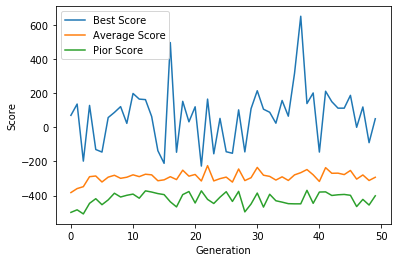

In [8]:
plt.plot(score_best, label="Best Score")
plt.plot(score_aver, label="Average Score")
plt.plot(score_pior, label="Pior Score")
plt.xlabel("Generation")
plt.ylabel("Score")
plt.legend()

print("Melhor individuo", bestInd)

In [17]:
dataFile = open('GAindividual_bestSmall.txt', 'w')
dataFile.write(str(bestInd))
dataFile.write("\n")
dataFile.close()

!python3 pacman.py -n 10 -l smallClassic -p GAagents --agentArgs "tableMode=Small,f=GAindividual_bestSmall.txt"


layout:  smallClassic
Pacman died! Score: -398
Pacman died! Score: -398
Pacman died! Score: -421
Pacman died! Score: -325
Pacman died! Score: -144
Pacman died! Score: -179
Pacman died! Score: -150
Pacman died! Score: -143
Pacman died! Score: -170
Pacman died! Score: -347
Average Score: -267.5
Scores:        -398.0, -398.0, -421.0, -325.0, -144.0, -179.0, -150.0, -143.0, -170.0, -347.0
Win Rate:      0/10 (0.00)
Record:        Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss


In [18]:
GA_resultScoreMedium = [-398.0, -398.0, -421.0, -325.0, -144.0, -179.0, -150.0, -143.0, -170.0, -347.0]
GA_resultAvrScoreMeidum = -267.5

### Medium Classic

Nós fizemos um aprendiçado com o mapa mediumClassic (opcão 1) que tem 2 fantasmas, em cada geração temos 25 individuos e só aprendemos 50 gerações como uma probabilidade de crossover de 0.70 e mutação de 0.20. Internamente se faz 3 iterações por cada individuos e obtemos a media do score. Nosso fitness esta definido pelo score dado do jogo.

In [62]:
bestInd, score_aver, score_best, score_pior = algorithmGenetic(1, 25,50, 0.70, 0.20 )

['layout:  mediumClassic', 'Pacman died! Score: -389', 'Pacman died! Score: -491', 'Pacman died! Score: -381', 'Average Score: -420.3333333333333', 'Scores:        -389.0, -491.0, -381.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -433', 'Pacman died! Score: -451', 'Pacman died! Score: -488', 'Average Score: -457.3333333333333', 'Scores:        -433.0, -451.0, -488.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -469', 'Pacman died! Score: -465', 'Pacman died! Score: -466', 'Average Score: -466.6666666666667', 'Scores:        -469.0, -465.0, -466.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -445', 'Pacman died! Score: -450', 'Pacman died! Score: -468', 'Average Score: -454.3333333333333', 'Scores:        -445.0, -450.0, -468.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, L

['layout:  mediumClassic', 'Pacman died! Score: -436', 'Pacman died! Score: -504', 'Pacman died! Score: -314', 'Average Score: -418.0', 'Scores:        -436.0, -504.0, -314.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -306', 'Pacman died! Score: -486', 'Pacman died! Score: -383', 'Average Score: -391.6666666666667', 'Scores:        -306.0, -486.0, -383.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -159', 'Pacman died! Score: -316', 'Pacman died! Score: -283', 'Average Score: -252.66666666666666', 'Scores:        -159.0, -316.0, -283.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -477', 'Pacman died! Score: -517', 'Pacman died! Score: -466', 'Average Score: -486.6666666666667', 'Scores:        -477.0, -517.0, -466.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']

['layout:  mediumClassic', 'Pacman died! Score: -319', 'Pacman died! Score: -412', 'Pacman died! Score: -199', 'Average Score: -310.0', 'Scores:        -319.0, -412.0, -199.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -177', 'Pacman died! Score: -227', 'Pacman died! Score: -247', 'Average Score: -217.0', 'Scores:        -177.0, -227.0, -247.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -577', 'Pacman died! Score: -101', 'Pacman died! Score: -302', 'Average Score: -326.6666666666667', 'Scores:        -577.0, -101.0, -302.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -459', 'Pacman died! Score: -464', 'Pacman died! Score: -375', 'Average Score: -432.6666666666667', 'Scores:        -459.0, -464.0, -375.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  m

['layout:  mediumClassic', 'Pacman died! Score: -504', 'Pacman died! Score: -380', 'Pacman died! Score: -388', 'Average Score: -424.0', 'Scores:        -504.0, -380.0, -388.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
[-199, -148, -155, -65] [-404.08, -382.28, -361.8, -302.2] [-596, -570, -533, -530]
['layout:  mediumClassic', 'Pacman died! Score: -69', 'Pacman died! Score: -206', 'Pacman died! Score: -145', 'Average Score: -140.0', 'Scores:        -69.0, -206.0, -145.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: 13', 'Pacman died! Score: -333', 'Pacman died! Score: -275', 'Average Score: -198.33333333333334', 'Scores:        13.0, -333.0, -275.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -366', 'Pacman died! Score: -206', 'Pacman died! Score: -284', 'Average Score: -285.3333333333333', 'Scores:        -366.0, -206.0, -284.0

['layout:  mediumClassic', 'Pacman died! Score: -287', 'Pacman died! Score: -387', 'Pacman died! Score: -310', 'Average Score: -328.0', 'Scores:        -287.0, -387.0, -310.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -382', 'Pacman died! Score: -157', 'Pacman died! Score: -358', 'Average Score: -299.0', 'Scores:        -382.0, -157.0, -358.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -306', 'Pacman died! Score: 63', 'Pacman died! Score: -414', 'Average Score: -219.0', 'Scores:        -306.0, 63.0, -414.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -167', 'Pacman died! Score: -402', 'Pacman died! Score: -447', 'Average Score: -338.6666666666667', 'Scores:        -167.0, -402.0, -447.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', '

['layout:  mediumClassic', 'Pacman died! Score: -82', 'Pacman died! Score: -224', 'Pacman died! Score: -396', 'Average Score: -234.0', 'Scores:        -82.0, -224.0, -396.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -134', 'Pacman died! Score: -362', 'Pacman died! Score: -194', 'Average Score: -230.0', 'Scores:        -134.0, -362.0, -194.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -115', 'Pacman died! Score: -390', 'Pacman died! Score: 266', 'Average Score: -79.66666666666667', 'Scores:        -115.0, -390.0, 266.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: 23', 'Pacman died! Score: -319', 'Pacman died! Score: -352', 'Average Score: -216.0', 'Scores:        23.0, -319.0, -352.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacm

['layout:  mediumClassic', 'Pacman died! Score: -318', 'Pacman died! Score: 465', 'Pacman died! Score: 204', 'Average Score: 117.0', 'Scores:        -318.0, 465.0, 204.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -545', 'Pacman died! Score: -455', 'Pacman died! Score: -451', 'Average Score: -483.6666666666667', 'Scores:        -545.0, -455.0, -451.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
[-199, -148, -155, -65, -110, -83, -59, 117] [-404.08, -382.28, -361.8, -302.2, -272.36, -256.16, -240.04, -267.52] [-596, -570, -533, -530, -473, -438, -403, -483]
['layout:  mediumClassic', 'Pacman died! Score: -98', 'Pacman died! Score: 175', 'Pacman died! Score: -172', 'Average Score: -31.666666666666668', 'Scores:        -98.0, 175.0, -172.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -403', 'Pacman died! Score: -368', 'Pacman died!

['layout:  mediumClassic', 'Pacman died! Score: -116', 'Pacman died! Score: -100', 'Pacman died! Score: -219', 'Average Score: -145.0', 'Scores:        -116.0, -100.0, -219.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -186', 'Pacman died! Score: -277', 'Pacman died! Score: -253', 'Average Score: -238.66666666666666', 'Scores:        -186.0, -277.0, -253.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -387', 'Pacman died! Score: -378', 'Pacman died! Score: -422', 'Average Score: -395.6666666666667', 'Scores:        -387.0, -378.0, -422.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -100', 'Pacman died! Score: -78', 'Pacman died! Score: 110', 'Average Score: -22.666666666666668', 'Scores:        -100.0, -78.0, 110.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['

['layout:  mediumClassic', 'Pacman died! Score: -96', 'Pacman died! Score: -173', 'Pacman died! Score: -362', 'Average Score: -210.33333333333334', 'Scores:        -96.0, -173.0, -362.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -169', 'Pacman died! Score: -394', 'Pacman died! Score: -247', 'Average Score: -270.0', 'Scores:        -169.0, -394.0, -247.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -391', 'Pacman died! Score: -53', 'Pacman died! Score: -367', 'Average Score: -270.3333333333333', 'Scores:        -391.0, -53.0, -367.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -259', 'Pacman died! Score: -399', 'Pacman died! Score: -554', 'Average Score: -404.0', 'Scores:        -259.0, -399.0, -554.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  medi

['layout:  mediumClassic', 'Pacman died! Score: -168', 'Pacman died! Score: -126', 'Pacman died! Score: -65', 'Average Score: -119.66666666666667', 'Scores:        -168.0, -126.0, -65.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -267', 'Pacman died! Score: -288', 'Pacman died! Score: -170', 'Average Score: -241.66666666666666', 'Scores:        -267.0, -288.0, -170.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -163', 'Pacman died! Score: -234', 'Pacman died! Score: -196', 'Average Score: -197.66666666666666', 'Scores:        -163.0, -234.0, -196.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -476', 'Pacman died! Score: -453', 'Pacman died! Score: -466', 'Average Score: -465.0', 'Scores:        -476.0, -453.0, -466.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']

['layout:  mediumClassic', 'Pacman died! Score: -222', 'Pacman died! Score: -398', 'Pacman died! Score: -390', 'Average Score: -336.6666666666667', 'Scores:        -222.0, -398.0, -390.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -243', 'Pacman died! Score: -237', 'Pacman died! Score: -168', 'Average Score: -216.0', 'Scores:        -243.0, -237.0, -168.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -287', 'Pacman died! Score: -327', 'Pacman died! Score: 83', 'Average Score: -177.0', 'Scores:        -287.0, -327.0, 83.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -278', 'Pacman died! Score: -203', 'Pacman died! Score: -316', 'Average Score: -265.6666666666667', 'Scores:        -278.0, -203.0, -316.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediu

['layout:  mediumClassic', 'Pacman died! Score: -158', 'Pacman died! Score: -319', 'Pacman died! Score: 186', 'Average Score: -97.0', 'Scores:        -158.0, -319.0, 186.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -292', 'Pacman died! Score: 291', 'Pacman died! Score: 153', 'Average Score: 50.666666666666664', 'Scores:        -292.0, 291.0, 153.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -378', 'Pacman died! Score: -15', 'Pacman died! Score: -368', 'Average Score: -253.66666666666666', 'Scores:        -378.0, -15.0, -368.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -217', 'Pacman died! Score: -178', 'Pacman died! Score: -246', 'Average Score: -213.66666666666666', 'Scores:        -217.0, -178.0, -246.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layou

['layout:  mediumClassic', 'Pacman died! Score: -287', 'Pacman died! Score: 1', 'Pacman died! Score: 32', 'Average Score: -84.66666666666667', 'Scores:        -287.0, 1.0, 32.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -390', 'Pacman died! Score: -344', 'Pacman died! Score: -257', 'Average Score: -330.3333333333333', 'Scores:        -390.0, -344.0, -257.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -262', 'Pacman died! Score: 19', 'Pacman died! Score: -310', 'Average Score: -184.33333333333334', 'Scores:        -262.0, 19.0, -310.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -172', 'Pacman died! Score: -366', 'Pacman died! Score: -328', 'Average Score: -288.6666666666667', 'Scores:        -172.0, -366.0, -328.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
[

['layout:  mediumClassic', 'Pacman died! Score: -476', 'Pacman died! Score: -484', 'Pacman died! Score: -475', 'Average Score: -478.3333333333333', 'Scores:        -476.0, -484.0, -475.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
[-199, -148, -155, -65, -110, -83, -59, 117, -21, -22, -70, -88, -104, -34, 50, -18, 12] [-404.08, -382.28, -361.8, -302.2, -272.36, -256.16, -240.04, -267.52, -215.52, -255.92, -237.0, -226.6, -282.44, -253.08, -234.76, -254.04, -255.84] [-596, -570, -533, -530, -473, -438, -403, -483, -439, -479, -404, -465, -481, -476, -453, -482, -478]
['layout:  mediumClassic', 'Pacman died! Score: -306', 'Pacman died! Score: -307', 'Pacman died! Score: -69', 'Average Score: -227.33333333333334', 'Scores:        -306.0, -307.0, -69.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -320', 'Pacman died! Score: -75', 'Pacman died! Score: -397', 'Average Score: -264.0', 'Scores:        -3

['layout:  mediumClassic', 'Pacman died! Score: -190', 'Pacman died! Score: -17', 'Pacman died! Score: -406', 'Average Score: -204.33333333333334', 'Scores:        -190.0, -17.0, -406.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -378', 'Pacman died! Score: -169', 'Pacman died! Score: -330', 'Average Score: -292.3333333333333', 'Scores:        -378.0, -169.0, -330.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -161', 'Pacman died! Score: -391', 'Pacman died! Score: -276', 'Average Score: -276.0', 'Scores:        -161.0, -391.0, -276.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -201', 'Pacman died! Score: -473', 'Pacman died! Score: -275', 'Average Score: -316.3333333333333', 'Scores:        -201.0, -473.0, -275.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
[

['layout:  mediumClassic', 'Pacman died! Score: -168', 'Pacman died! Score: -374', 'Pacman died! Score: -56', 'Average Score: -199.33333333333334', 'Scores:        -168.0, -374.0, -56.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -211', 'Pacman died! Score: -361', 'Pacman died! Score: -422', 'Average Score: -331.3333333333333', 'Scores:        -211.0, -361.0, -422.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -391', 'Pacman died! Score: -374', 'Pacman died! Score: -372', 'Average Score: -379.0', 'Scores:        -391.0, -374.0, -372.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -344', 'Pacman died! Score: 205', 'Pacman died! Score: -76', 'Average Score: -71.66666666666667', 'Scores:        -344.0, 205.0, -76.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['lay

['layout:  mediumClassic', 'Pacman died! Score: -225', 'Pacman died! Score: -274', 'Pacman died! Score: 44', 'Average Score: -151.66666666666666', 'Scores:        -225.0, -274.0, 44.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -389', 'Pacman died! Score: -420', 'Pacman died! Score: -164', 'Average Score: -324.3333333333333', 'Scores:        -389.0, -420.0, -164.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -333', 'Pacman died! Score: 15', 'Pacman died! Score: -391', 'Average Score: -236.33333333333334', 'Scores:        -333.0, 15.0, -391.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -168', 'Pacman died! Score: -491', 'Pacman died! Score: -478', 'Average Score: -379.0', 'Scores:        -168.0, -491.0, -478.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layo

['layout:  mediumClassic', 'Pacman died! Score: -221', 'Pacman died! Score: -373', 'Pacman died! Score: -402', 'Average Score: -332.0', 'Scores:        -221.0, -373.0, -402.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -283', 'Pacman died! Score: -100', 'Pacman died! Score: -178', 'Average Score: -187.0', 'Scores:        -283.0, -100.0, -178.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -47', 'Pacman died! Score: -268', 'Pacman died! Score: -384', 'Average Score: -233.0', 'Scores:        -47.0, -268.0, -384.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -103', 'Pacman died! Score: -414', 'Pacman died! Score: -195', 'Average Score: -237.33333333333334', 'Scores:        -103.0, -414.0, -195.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic'

['layout:  mediumClassic', 'Pacman died! Score: -237', 'Pacman died! Score: -196', 'Pacman died! Score: -189', 'Average Score: -207.33333333333334', 'Scores:        -237.0, -196.0, -189.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -389', 'Pacman died! Score: -369', 'Pacman died! Score: 95', 'Average Score: -221.0', 'Scores:        -389.0, -369.0, 95.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -401', 'Pacman died! Score: -320', 'Pacman died! Score: -162', 'Average Score: -294.3333333333333', 'Scores:        -401.0, -320.0, -162.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -303', 'Pacman died! Score: -364', 'Pacman died! Score: -180', 'Average Score: -282.3333333333333', 'Scores:        -303.0, -364.0, -180.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['l

['layout:  mediumClassic', 'Pacman died! Score: -83', 'Pacman died! Score: -184', 'Pacman died! Score: -289', 'Average Score: -185.33333333333334', 'Scores:        -83.0, -184.0, -289.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -25', 'Pacman died! Score: -118', 'Pacman died! Score: -193', 'Average Score: -112.0', 'Scores:        -25.0, -118.0, -193.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -2', 'Pacman died! Score: -98', 'Pacman died! Score: -352', 'Average Score: -150.66666666666666', 'Scores:        -2.0, -98.0, -352.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -298', 'Pacman died! Score: -391', 'Pacman died! Score: -316', 'Average Score: -335.0', 'Scores:        -298.0, -391.0, -316.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumCla

['layout:  mediumClassic', 'Pacman died! Score: -269', 'Pacman died! Score: -382', 'Pacman died! Score: -307', 'Average Score: -319.3333333333333', 'Scores:        -269.0, -382.0, -307.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -160', 'Pacman died! Score: 11', 'Pacman died! Score: 80', 'Average Score: -23.0', 'Scores:        -160.0, 11.0, 80.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -308', 'Pacman died! Score: -317', 'Pacman died! Score: -449', 'Average Score: -358.0', 'Scores:        -308.0, -317.0, -449.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -488', 'Pacman died! Score: -524', 'Pacman died! Score: -457', 'Average Score: -489.6666666666667', 'Scores:        -488.0, -524.0, -457.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
[-199, -148, -155, -6

['layout:  mediumClassic', 'Pacman died! Score: 183', 'Pacman died! Score: -163', 'Pacman died! Score: -357', 'Average Score: -112.33333333333333', 'Scores:        183.0, -163.0, -357.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -358', 'Pacman died! Score: -244', 'Pacman died! Score: -401', 'Average Score: -334.3333333333333', 'Scores:        -358.0, -244.0, -401.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -414', 'Pacman died! Score: -227', 'Pacman died! Score: -378', 'Average Score: -339.6666666666667', 'Scores:        -414.0, -227.0, -378.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -244', 'Pacman died! Score: -204', 'Pacman died! Score: -77', 'Average Score: -175.0', 'Scores:        -244.0, -204.0, -77.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['l

['layout:  mediumClassic', 'Pacman died! Score: -371', 'Pacman died! Score: -362', 'Pacman died! Score: -317', 'Average Score: -350.0', 'Scores:        -371.0, -362.0, -317.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -273', 'Pacman died! Score: -24', 'Pacman died! Score: -502', 'Average Score: -266.3333333333333', 'Scores:        -273.0, -24.0, -502.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -131', 'Pacman died! Score: -137', 'Pacman died! Score: -121', 'Average Score: -129.66666666666666', 'Scores:        -131.0, -137.0, -121.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -305', 'Pacman died! Score: -357', 'Pacman died! Score: -313', 'Average Score: -325.0', 'Scores:        -305.0, -357.0, -313.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  me

['layout:  mediumClassic', 'Pacman died! Score: -263', 'Pacman died! Score: -105', 'Pacman died! Score: -414', 'Average Score: -260.6666666666667', 'Scores:        -263.0, -105.0, -414.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -166', 'Pacman died! Score: -508', 'Pacman died! Score: -141', 'Average Score: -271.6666666666667', 'Scores:        -166.0, -508.0, -141.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -205', 'Pacman died! Score: -170', 'Pacman died! Score: -445', 'Average Score: -273.3333333333333', 'Scores:        -205.0, -170.0, -445.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -375', 'Pacman died! Score: -272', 'Pacman died! Score: -332', 'Average Score: -326.3333333333333', 'Scores:        -375.0, -272.0, -332.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, L

['layout:  mediumClassic', 'Pacman died! Score: -221', 'Pacman died! Score: -59', 'Pacman died! Score: -439', 'Average Score: -239.66666666666666', 'Scores:        -221.0, -59.0, -439.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -253', 'Pacman died! Score: -414', 'Pacman died! Score: -413', 'Average Score: -360.0', 'Scores:        -253.0, -414.0, -413.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -297', 'Pacman died! Score: -414', 'Pacman died! Score: -17', 'Average Score: -242.66666666666666', 'Scores:        -297.0, -414.0, -17.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -413', 'Pacman died! Score: -199', 'Pacman died! Score: -410', 'Average Score: -340.6666666666667', 'Scores:        -413.0, -199.0, -410.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['

['layout:  mediumClassic', 'Pacman died! Score: -458', 'Pacman died! Score: -472', 'Pacman died! Score: -503', 'Average Score: -477.6666666666667', 'Scores:        -458.0, -472.0, -503.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
[-199, -148, -155, -65, -110, -83, -59, 117, -21, -22, -70, -88, -104, -34, 50, -18, 12, -39, -78, -35, -49, -75, -57, -81, -45, 66, -22, -82, -60, -14, -92, -16] [-404.08, -382.28, -361.8, -302.2, -272.36, -256.16, -240.04, -267.52, -215.52, -255.92, -237.0, -226.6, -282.44, -253.08, -234.76, -254.04, -255.84, -260.64, -239.68, -234.6, -237.28, -263.0, -250.64, -233.88, -226.48, -259.0, -254.08, -246.28, -245.2, -232.84, -270.72, -223.32] [-596, -570, -533, -530, -473, -438, -403, -483, -439, -479, -404, -465, -481, -476, -453, -482, -478, -530, -423, -445, -379, -519, -471, -457, -419, -511, -469, -433, -482, -386, -460, -477]
['layout:  mediumClassic', 'Pacman died! Score: -86', 'Pacman died! Score: -168', 'Pacman died! Score: -155', 

['layout:  mediumClassic', 'Pacman died! Score: -190', 'Pacman died! Score: -77', 'Pacman died! Score: -167', 'Average Score: -144.66666666666666', 'Scores:        -190.0, -77.0, -167.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -170', 'Pacman died! Score: -267', 'Pacman died! Score: -385', 'Average Score: -274.0', 'Scores:        -170.0, -267.0, -385.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -205', 'Pacman died! Score: -406', 'Pacman died! Score: -42', 'Average Score: -217.66666666666666', 'Scores:        -205.0, -406.0, -42.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -138', 'Pacman died! Score: -352', 'Pacman died! Score: -252', 'Average Score: -247.33333333333334', 'Scores:        -138.0, -352.0, -252.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
[

['layout:  mediumClassic', 'Pacman died! Score: 38', 'Pacman died! Score: -276', 'Pacman died! Score: -303', 'Average Score: -180.33333333333334', 'Scores:        38.0, -276.0, -303.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -166', 'Pacman died! Score: 20', 'Pacman died! Score: -284', 'Average Score: -143.33333333333334', 'Scores:        -166.0, 20.0, -284.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -247', 'Pacman died! Score: -217', 'Pacman died! Score: -86', 'Average Score: -183.33333333333334', 'Scores:        -247.0, -217.0, -86.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -390', 'Pacman died! Score: -317', 'Pacman died! Score: -377', 'Average Score: -361.3333333333333', 'Scores:        -390.0, -317.0, -377.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Lo

['layout:  mediumClassic', 'Pacman died! Score: -64', 'Pacman died! Score: -382', 'Pacman died! Score: -308', 'Average Score: -251.33333333333334', 'Scores:        -64.0, -382.0, -308.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -277', 'Pacman died! Score: -391', 'Pacman died! Score: -258', 'Average Score: -308.6666666666667', 'Scores:        -277.0, -391.0, -258.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -227', 'Pacman died! Score: -143', 'Pacman died! Score: -108', 'Average Score: -159.33333333333334', 'Scores:        -227.0, -143.0, -108.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -167', 'Pacman died! Score: -373', 'Pacman died! Score: -242', 'Average Score: -260.6666666666667', 'Scores:        -167.0, -373.0, -242.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, L

['layout:  mediumClassic', 'Pacman died! Score: -232', 'Pacman died! Score: -302', 'Pacman died! Score: -364', 'Average Score: -299.3333333333333', 'Scores:        -232.0, -302.0, -364.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -351', 'Pacman died! Score: -337', 'Pacman died! Score: -294', 'Average Score: -327.3333333333333', 'Scores:        -351.0, -337.0, -294.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -405', 'Pacman died! Score: -191', 'Pacman died! Score: -362', 'Average Score: -319.3333333333333', 'Scores:        -405.0, -191.0, -362.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -206', 'Pacman died! Score: -374', 'Pacman died! Score: -211', 'Average Score: -263.6666666666667', 'Scores:        -206.0, -374.0, -211.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, L

['layout:  mediumClassic', 'Pacman died! Score: -18', 'Pacman died! Score: -255', 'Pacman died! Score: -209', 'Average Score: -160.66666666666666', 'Scores:        -18.0, -255.0, -209.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -292', 'Pacman died! Score: -189', 'Pacman died! Score: -276', 'Average Score: -252.33333333333334', 'Scores:        -292.0, -189.0, -276.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -122', 'Pacman died! Score: -73', 'Pacman died! Score: -414', 'Average Score: -203.0', 'Scores:        -122.0, -73.0, -414.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -199', 'Pacman died! Score: -314', 'Pacman died! Score: -57', 'Average Score: -190.0', 'Scores:        -199.0, -314.0, -57.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediu

['layout:  mediumClassic', 'Pacman died! Score: -321', 'Pacman died! Score: -194', 'Pacman died! Score: -44', 'Average Score: -186.33333333333334', 'Scores:        -321.0, -194.0, -44.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -390', 'Pacman died! Score: -584', 'Pacman died! Score: -360', 'Average Score: -444.6666666666667', 'Scores:        -390.0, -584.0, -360.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: 52', 'Pacman died! Score: -235', 'Pacman died! Score: -351', 'Average Score: -178.0', 'Scores:        52.0, -235.0, -351.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -256', 'Pacman died! Score: 23', 'Pacman died! Score: -235', 'Average Score: -156.0', 'Scores:        -256.0, 23.0, -235.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClas

['layout:  mediumClassic', 'Pacman died! Score: -198', 'Pacman died! Score: -299', 'Pacman died! Score: -376', 'Average Score: -291.0', 'Scores:        -198.0, -299.0, -376.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -185', 'Pacman died! Score: -209', 'Pacman died! Score: -205', 'Average Score: -199.66666666666666', 'Scores:        -185.0, -209.0, -205.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -289', 'Pacman died! Score: -392', 'Pacman died! Score: -74', 'Average Score: -251.66666666666666', 'Scores:        -289.0, -392.0, -74.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -326', 'Pacman died! Score: -303', 'Pacman died! Score: 88', 'Average Score: -180.33333333333334', 'Scores:        -326.0, -303.0, 88.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['l

['layout:  mediumClassic', 'Pacman died! Score: -148', 'Pacman died! Score: -188', 'Pacman died! Score: 45', 'Average Score: -97.0', 'Scores:        -148.0, -188.0, 45.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -396', 'Pacman died! Score: -150', 'Pacman died! Score: -354', 'Average Score: -300.0', 'Scores:        -396.0, -150.0, -354.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: 14', 'Pacman died! Score: -340', 'Pacman died! Score: -424', 'Average Score: -250.0', 'Scores:        14.0, -340.0, -424.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -61', 'Pacman died! Score: -162', 'Pacman died! Score: -161', 'Average Score: -128.0', 'Scores:        -61.0, -162.0, -161.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score:

['layout:  mediumClassic', 'Pacman died! Score: -298', 'Pacman died! Score: -382', 'Pacman died! Score: 16', 'Average Score: -221.33333333333334', 'Scores:        -298.0, -382.0, 16.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -48', 'Pacman died! Score: -414', 'Pacman died! Score: -43', 'Average Score: -168.33333333333334', 'Scores:        -48.0, -414.0, -43.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -440', 'Pacman died! Score: -220', 'Pacman died! Score: -214', 'Average Score: -291.3333333333333', 'Scores:        -440.0, -220.0, -214.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -305', 'Pacman died! Score: -290', 'Pacman died! Score: 99', 'Average Score: -165.33333333333334', 'Scores:        -305.0, -290.0, 99.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss

['layout:  mediumClassic', 'Pacman died! Score: 301', 'Pacman died! Score: -389', 'Pacman died! Score: -347', 'Average Score: -145.0', 'Scores:        301.0, -389.0, -347.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -445', 'Pacman died! Score: -413', 'Pacman died! Score: -289', 'Average Score: -382.3333333333333', 'Scores:        -445.0, -413.0, -289.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -232', 'Pacman died! Score: -331', 'Pacman died! Score: -85', 'Average Score: -216.0', 'Scores:        -232.0, -331.0, -85.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -324', 'Pacman died! Score: -135', 'Pacman died! Score: -49', 'Average Score: -169.33333333333334', 'Scores:        -324.0, -135.0, -49.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  medium

['layout:  mediumClassic', 'Pacman died! Score: -210', 'Pacman died! Score: -413', 'Pacman died! Score: -341', 'Average Score: -321.3333333333333', 'Scores:        -210.0, -413.0, -341.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -271', 'Pacman died! Score: 137', 'Pacman died! Score: -391', 'Average Score: -175.0', 'Scores:        -271.0, 137.0, -391.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -269', 'Pacman died! Score: -385', 'Pacman died! Score: -254', 'Average Score: -302.6666666666667', 'Scores:        -269.0, -385.0, -254.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -141', 'Pacman died! Score: -287', 'Pacman died! Score: -166', 'Average Score: -198.0', 'Scores:        -141.0, -287.0, -166.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  med

['layout:  mediumClassic', 'Pacman died! Score: -440', 'Pacman died! Score: -391', 'Pacman died! Score: -380', 'Average Score: -403.6666666666667', 'Scores:        -440.0, -391.0, -380.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -161', 'Pacman died! Score: -297', 'Pacman died! Score: -24', 'Average Score: -160.66666666666666', 'Scores:        -161.0, -297.0, -24.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -272', 'Pacman died! Score: -129', 'Pacman died! Score: -29', 'Average Score: -143.33333333333334', 'Scores:        -272.0, -129.0, -29.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -414', 'Pacman died! Score: -379', 'Pacman died! Score: -199', 'Average Score: -330.6666666666667', 'Scores:        -414.0, -379.0, -199.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Los

['layout:  mediumClassic', 'Pacman died! Score: -447', 'Pacman died! Score: -475', 'Pacman died! Score: -509', 'Average Score: -477.0', 'Scores:        -447.0, -475.0, -509.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -241', 'Pacman died! Score: -375', 'Pacman died! Score: 172', 'Average Score: -148.0', 'Scores:        -241.0, -375.0, 172.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -196', 'Pacman died! Score: -332', 'Pacman died! Score: -244', 'Average Score: -257.3333333333333', 'Scores:        -196.0, -332.0, -244.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -162', 'Pacman died! Score: -181', 'Pacman died! Score: -5', 'Average Score: -116.0', 'Scores:        -162.0, -181.0, -5.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pa

['layout:  mediumClassic', 'Pacman died! Score: -393', 'Pacman died! Score: -447', 'Pacman died! Score: -460', 'Average Score: -433.3333333333333', 'Scores:        -393.0, -447.0, -460.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -353', 'Pacman died! Score: -127', 'Pacman died! Score: -374', 'Average Score: -284.6666666666667', 'Scores:        -353.0, -127.0, -374.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -177', 'Pacman died! Score: -382', 'Pacman died! Score: -385', 'Average Score: -314.6666666666667', 'Scores:        -177.0, -382.0, -385.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -168', 'Pacman died! Score: -413', 'Pacman died! Score: -273', 'Average Score: -284.6666666666667', 'Scores:        -168.0, -413.0, -273.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, L

Melhor individuo [3, 'd1', 'd2', 4, 1, 'a1', 'a2', 'a3']


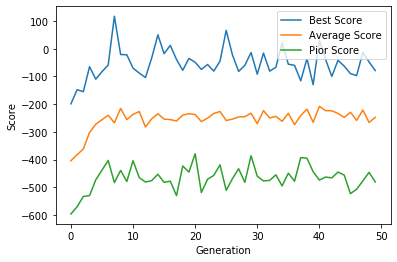

In [69]:
plt.plot(score_best, label="Best Score")
plt.plot(score_aver, label="Average Score")
plt.plot(score_pior, label="Pior Score")
plt.xlabel("Generation")
plt.ylabel("Score")
plt.legend()

print("Melhor individuo", bestInd)

Fazendo um teste como o melhor individuos em 10 testes pra observar qual é o average de meu score com esse individuo. 

In [70]:
dataFile = open('GAindividual_bestMedium.txt', 'w')
dataFile.write(str(bestInd))
dataFile.write("\n")
dataFile.close()

!python3 pacman.py -n 10 -l mediumClassic -p GAagents --agentArgs "tableMode=Medium,f=GAindividual_bestMedium.txt"


layout:  mediumClassic
Pacman died! Score: -57
Pacman died! Score: -326
Pacman died! Score: -380
Pacman died! Score: -175
Pacman died! Score: -230
Pacman died! Score: 40
Pacman died! Score: -187
Pacman died! Score: -364
Pacman died! Score: 167
Pacman died! Score: -264
Average Score: -177.6
Scores:        -57.0, -326.0, -380.0, -175.0, -230.0, 40.0, -187.0, -364.0, 167.0, -264.0
Win Rate:      0/10 (0.00)
Record:        Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss


In [ ]:

GA_resultScoreMedium = [-57.0, -326.0, -380.0, -175.0, -230.0, 40.0, -187.0, -364.0, 167.0, -264.0]
GA_resultAvrScoreMedium = -177.6

### Original 

Nós fizemos um aprendiçado com o mapa originalClassic (opcão 2) que tem 2 fantasmas, em cada geração temos 25 individuos e só aprendemos 50 gerações como uma probabilidade de crossover de 0.70 e mutação de 0.20. Internamente se faz 3 iterações por cada individuos e obtemos a media do score. Nosso fitness esta definido pelo score dado do jogo.

In [6]:
bestInd, score_aver, score_best, score_pior = algorithmGenetic(2, 25,50, 0.70, 0.20 )

['layout:  originalClassic', 'Pacman died! Score: -449', 'Pacman died! Score: -486', 'Pacman died! Score: -468', 'Average Score: -467.6666666666667', 'Scores:        -449.0, -486.0, -468.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -445', 'Pacman died! Score: -488', 'Pacman died! Score: -474', 'Average Score: -469.0', 'Scores:        -445.0, -488.0, -474.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -551', 'Pacman died! Score: -200', 'Pacman died! Score: -127', 'Average Score: -292.6666666666667', 'Scores:        -551.0, -200.0, -127.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -349', 'Pacman died! Score: -345', 'Pacman died! Score: -345', 'Average Score: -346.3333333333333', 'Scores:        -349.0, -345.0, -345.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss,

['layout:  originalClassic', 'Pacman died! Score: -506', 'Pacman died! Score: -489', 'Pacman died! Score: -463', 'Average Score: -486.0', 'Scores:        -506.0, -489.0, -463.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -319', 'Pacman died! Score: -468', 'Pacman died! Score: -464', 'Average Score: -417.0', 'Scores:        -319.0, -468.0, -464.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -470', 'Pacman died! Score: -463', 'Pacman died! Score: -502', 'Average Score: -478.3333333333333', 'Scores:        -470.0, -463.0, -502.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -481', 'Pacman died! Score: -447', 'Pacman died! Score: -495', 'Average Score: -474.3333333333333', 'Scores:        -481.0, -447.0, -495.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['la

['layout:  originalClassic', 'Pacman died! Score: -336', 'Pacman died! Score: -460', 'Pacman died! Score: -489', 'Average Score: -428.3333333333333', 'Scores:        -336.0, -460.0, -489.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -119', 'Pacman died! Score: -124', 'Pacman died! Score: -82', 'Average Score: -108.33333333333333', 'Scores:        -119.0, -124.0, -82.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -446', 'Pacman died! Score: -452', 'Pacman died! Score: -455', 'Average Score: -451.0', 'Scores:        -446.0, -452.0, -455.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -585', 'Pacman died! Score: -465', 'Pacman died! Score: -543', 'Average Score: -531.0', 'Scores:        -585.0, -465.0, -543.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['lay

['layout:  originalClassic', 'Pacman died! Score: -542', 'Pacman died! Score: -469', 'Pacman died! Score: -647', 'Average Score: -552.6666666666666', 'Scores:        -542.0, -469.0, -647.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
[-57, 3, 222, -71] [-387.64, -372.64, -341.76, -342.44] [-562, -523, -531, -552]
['layout:  originalClassic', 'Pacman died! Score: -302', 'Pacman died! Score: -153', 'Pacman died! Score: -199', 'Average Score: -218.0', 'Scores:        -302.0, -153.0, -199.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -388', 'Pacman died! Score: -488', 'Pacman died! Score: -433', 'Average Score: -436.3333333333333', 'Scores:        -388.0, -488.0, -433.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -176', 'Pacman died! Score: -200', 'Pacman died! Score: -176', 'Average Score: -184.0', 'Scores:        -176.0, -200

['layout:  originalClassic', 'Pacman died! Score: -519', 'Pacman died! Score: -500', 'Pacman died! Score: -426', 'Average Score: -481.6666666666667', 'Scores:        -519.0, -500.0, -426.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -475', 'Pacman died! Score: -477', 'Pacman died! Score: -434', 'Average Score: -462.0', 'Scores:        -475.0, -477.0, -434.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: 650', 'Pacman died! Score: 16', 'Pacman died! Score: 287', 'Average Score: 317.6666666666667', 'Scores:        650.0, 16.0, 287.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -331', 'Pacman died! Score: -178', 'Pacman died! Score: -280', 'Average Score: -263.0', 'Scores:        -331.0, -178.0, -280.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  or

['layout:  originalClassic', 'Pacman died! Score: -435', 'Pacman died! Score: -497', 'Pacman died! Score: -451', 'Average Score: -461.0', 'Scores:        -435.0, -497.0, -451.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -197', 'Pacman died! Score: -320', 'Pacman died! Score: 63', 'Average Score: -151.33333333333334', 'Scores:        -197.0, -320.0, 63.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -95', 'Pacman died! Score: 540', 'Pacman died! Score: -221', 'Average Score: 74.66666666666667', 'Scores:        -95.0, 540.0, -221.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -284', 'Pacman died! Score: -145', 'Pacman died! Score: -248', 'Average Score: -225.66666666666666', 'Scores:        -284.0, -145.0, -248.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']

['layout:  originalClassic', 'Pacman died! Score: 536', 'Pacman died! Score: -110', 'Pacman died! Score: -228', 'Average Score: 66.0', 'Scores:        536.0, -110.0, -228.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -416', 'Pacman died! Score: -433', 'Pacman died! Score: -502', 'Average Score: -450.3333333333333', 'Scores:        -416.0, -433.0, -502.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
[-57, 3, 222, -71, 87, 413, 186, 180] [-387.64, -372.64, -341.76, -342.44, -340.04, -258.2, -205.92, -119.2] [-562, -523, -531, -552, -598, -574, -488, -464]
['layout:  originalClassic', 'Pacman died! Score: -291', 'Pacman died! Score: -107', 'Pacman died! Score: 182', 'Average Score: -72.0', 'Scores:        -291.0, -107.0, 182.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -106', 'Pacman died! Score: -108', 'Pacman died! Score: -2

['layout:  originalClassic', 'Pacman died! Score: -65', 'Pacman died! Score: -195', 'Pacman died! Score: 557', 'Average Score: 99.0', 'Scores:        -65.0, -195.0, 557.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: 507', 'Pacman died! Score: 645', 'Pacman died! Score: -167', 'Average Score: 328.3333333333333', 'Scores:        507.0, 645.0, -167.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -180', 'Pacman died! Score: -142', 'Pacman died! Score: -317', 'Average Score: -213.0', 'Scores:        -180.0, -142.0, -317.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -332', 'Pacman died! Score: 583', 'Pacman died! Score: 464', 'Average Score: 238.33333333333334', 'Scores:        -332.0, 583.0, 464.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  original

['layout:  originalClassic', 'Pacman died! Score: -172', 'Pacman died! Score: -163', 'Pacman died! Score: 169', 'Average Score: -55.333333333333336', 'Scores:        -172.0, -163.0, 169.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -92', 'Pacman died! Score: -68', 'Pacman died! Score: 323', 'Average Score: 54.333333333333336', 'Scores:        -92.0, -68.0, 323.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -154', 'Pacman died! Score: -162', 'Pacman died! Score: 91', 'Average Score: -75.0', 'Scores:        -154.0, -162.0, 91.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -194', 'Pacman died! Score: 741', 'Pacman died! Score: -141', 'Average Score: 135.33333333333334', 'Scores:        -194.0, 741.0, -141.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layo

['layout:  originalClassic', 'Pacman died! Score: -230', 'Pacman died! Score: -53', 'Pacman died! Score: -147', 'Average Score: -143.33333333333334', 'Scores:        -230.0, -53.0, -147.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -187', 'Pacman died! Score: -110', 'Pacman died! Score: -295', 'Average Score: -197.33333333333334', 'Scores:        -187.0, -110.0, -295.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: 9', 'Pacman died! Score: -207', 'Pacman died! Score: 775', 'Average Score: 192.33333333333334', 'Scores:        9.0, -207.0, 775.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: 322', 'Pacman died! Score: -212', 'Pacman died! Score: -230', 'Average Score: -40.0', 'Scores:        322.0, -212.0, -230.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['l

['layout:  originalClassic', 'Pacman died! Score: -127', 'Pacman died! Score: -182', 'Pacman died! Score: 47', 'Average Score: -87.33333333333333', 'Scores:        -127.0, -182.0, 47.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: 1224', 'Pacman died! Score: 177', 'Pacman died! Score: -118', 'Average Score: 427.6666666666667', 'Scores:        1224.0, 177.0, -118.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: 157', 'Pacman died! Score: 764', 'Pacman died! Score: 90', 'Average Score: 337.0', 'Scores:        157.0, 764.0, 90.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -423', 'Pacman died! Score: -518', 'Pacman died! Score: -469', 'Average Score: -470.0', 'Scores:        -423.0, -518.0, -469.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalC

['layout:  originalClassic', 'Pacman died! Score: -203', 'Pacman died! Score: 782', 'Pacman died! Score: 47', 'Average Score: 208.66666666666666', 'Scores:        -203.0, 782.0, 47.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: 35', 'Pacman died! Score: -139', 'Pacman died! Score: 338', 'Average Score: 78.0', 'Scores:        35.0, -139.0, 338.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: 278', 'Pacman died! Score: -191', 'Pacman died! Score: -380', 'Average Score: -97.66666666666667', 'Scores:        278.0, -191.0, -380.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -217', 'Pacman died! Score: 65', 'Pacman died! Score: -122', 'Average Score: -91.33333333333333', 'Scores:        -217.0, 65.0, -122.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  o

['layout:  originalClassic', 'Pacman died! Score: -167', 'Pacman died! Score: 83', 'Pacman died! Score: -113', 'Average Score: -65.66666666666667', 'Scores:        -167.0, 83.0, -113.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -216', 'Pacman died! Score: -184', 'Pacman died! Score: -126', 'Average Score: -175.33333333333334', 'Scores:        -216.0, -184.0, -126.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: 54', 'Pacman died! Score: -255', 'Pacman died! Score: -187', 'Average Score: -129.33333333333334', 'Scores:        54.0, -255.0, -187.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -277', 'Pacman died! Score: -124', 'Pacman died! Score: -302', 'Average Score: -234.33333333333334', 'Scores:        -277.0, -124.0, -302.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss

['layout:  originalClassic', 'Pacman died! Score: -217', 'Pacman died! Score: -151', 'Pacman died! Score: -133', 'Average Score: -167.0', 'Scores:        -217.0, -151.0, -133.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -439', 'Pacman died! Score: -443', 'Pacman died! Score: -412', 'Average Score: -431.3333333333333', 'Scores:        -439.0, -443.0, -412.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
[-57, 3, 222, -71, 87, 413, 186, 180, 375, 334, 490, 789, 506, 427, 567, 265, 234] [-387.64, -372.64, -341.76, -342.44, -340.04, -258.2, -205.92, -119.2, -68.08, -2.16, -73.84, -5.68, -41.92, -35.04, -2.2, -58.72, -99.04] [-562, -523, -531, -552, -598, -574, -488, -464, -590, -477, -514, -599, -475, -480, -529, -435, -459]
['layout:  originalClassic', 'Pacman died! Score: -131', 'Pacman died! Score: -221', 'Pacman died! Score: 296', 'Average Score: -18.666666666666668', 'Scores:        -131.0, -22

['layout:  originalClassic', 'Pacman died! Score: -188', 'Pacman died! Score: -192', 'Pacman died! Score: -224', 'Average Score: -201.33333333333334', 'Scores:        -188.0, -192.0, -224.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -118', 'Pacman died! Score: 131', 'Pacman died! Score: 29', 'Average Score: 14.0', 'Scores:        -118.0, 131.0, 29.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -45', 'Pacman died! Score: 628', 'Pacman died! Score: -161', 'Average Score: 140.66666666666666', 'Scores:        -45.0, 628.0, -161.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -241', 'Pacman died! Score: -265', 'Pacman died! Score: -167', 'Average Score: -224.33333333333334', 'Scores:        -241.0, -265.0, -167.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['

['layout:  originalClassic', 'Pacman died! Score: -109', 'Pacman died! Score: 301', 'Pacman died! Score: -273', 'Average Score: -27.0', 'Scores:        -109.0, 301.0, -273.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -119', 'Pacman died! Score: -170', 'Pacman died! Score: 60', 'Average Score: -76.33333333333333', 'Scores:        -119.0, -170.0, 60.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -215', 'Pacman died! Score: -157', 'Pacman died! Score: -158', 'Average Score: -176.66666666666666', 'Scores:        -215.0, -157.0, -158.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: 702', 'Pacman died! Score: -182', 'Pacman died! Score: -113', 'Average Score: 135.66666666666666', 'Scores:        702.0, -182.0, -113.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']


['layout:  originalClassic', 'Pacman died! Score: -363', 'Pacman died! Score: -243', 'Pacman died! Score: -256', 'Average Score: -287.3333333333333', 'Scores:        -363.0, -243.0, -256.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -221', 'Pacman died! Score: -221', 'Pacman died! Score: -118', 'Average Score: -186.66666666666666', 'Scores:        -221.0, -221.0, -118.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: 144', 'Pacman died! Score: -205', 'Pacman died! Score: 51', 'Average Score: -3.3333333333333335', 'Scores:        144.0, -205.0, 51.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: 540', 'Pacman died! Score: -207', 'Pacman died! Score: 513', 'Average Score: 282.0', 'Scores:        540.0, -207.0, 513.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
[

['layout:  originalClassic', 'Pacman died! Score: -120', 'Pacman died! Score: 411', 'Pacman died! Score: -149', 'Average Score: 47.333333333333336', 'Scores:        -120.0, 411.0, -149.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -207', 'Pacman died! Score: -121', 'Pacman died! Score: -208', 'Average Score: -178.66666666666666', 'Scores:        -207.0, -121.0, -208.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -112', 'Pacman died! Score: -107', 'Pacman died! Score: 741', 'Average Score: 174.0', 'Scores:        -112.0, -107.0, 741.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: 43', 'Pacman died! Score: -127', 'Pacman died! Score: -156', 'Average Score: -80.0', 'Scores:        43.0, -127.0, -156.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  or

['layout:  originalClassic', 'Pacman died! Score: 59', 'Pacman died! Score: 217', 'Pacman died! Score: -108', 'Average Score: 56.0', 'Scores:        59.0, 217.0, -108.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: 607', 'Pacman died! Score: -306', 'Pacman died! Score: -203', 'Average Score: 32.666666666666664', 'Scores:        607.0, -306.0, -203.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: 72', 'Pacman died! Score: -29', 'Pacman died! Score: 534', 'Average Score: 192.33333333333334', 'Scores:        72.0, -29.0, 534.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -176', 'Pacman died! Score: -250', 'Pacman died! Score: -187', 'Average Score: -204.33333333333334', 'Scores:        -176.0, -250.0, -187.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:

['layout:  originalClassic', 'Pacman died! Score: -468', 'Pacman died! Score: -460', 'Pacman died! Score: -421', 'Average Score: -449.6666666666667', 'Scores:        -468.0, -460.0, -421.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -37', 'Pacman died! Score: -239', 'Pacman died! Score: 91', 'Average Score: -61.666666666666664', 'Scores:        -37.0, -239.0, 91.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: 231', 'Pacman died! Score: -107', 'Pacman died! Score: 474', 'Average Score: 199.33333333333334', 'Scores:        231.0, -107.0, 474.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -280', 'Pacman died! Score: -207', 'Pacman died! Score: -179', 'Average Score: -222.0', 'Scores:        -280.0, -207.0, -179.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
[

['layout:  originalClassic', 'Pacman died! Score: -161', 'Pacman died! Score: 407', 'Pacman died! Score: 545', 'Average Score: 263.6666666666667', 'Scores:        -161.0, 407.0, 545.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: 278', 'Pacman died! Score: -155', 'Pacman died! Score: -177', 'Average Score: -18.0', 'Scores:        278.0, -155.0, -177.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -223', 'Pacman died! Score: 166', 'Pacman died! Score: 84', 'Average Score: 9.0', 'Scores:        -223.0, 166.0, 84.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -507', 'Pacman died! Score: -539', 'Pacman died! Score: -559', 'Average Score: -535.0', 'Scores:        -507.0, -539.0, -559.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
[-57, 3, 222, -71, 87, 413, 186, 

['layout:  originalClassic', 'Pacman died! Score: -315', 'Pacman died! Score: -208', 'Pacman died! Score: -315', 'Average Score: -279.3333333333333', 'Scores:        -315.0, -208.0, -315.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: 727', 'Pacman died! Score: -222', 'Pacman died! Score: -326', 'Average Score: 59.666666666666664', 'Scores:        727.0, -222.0, -326.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -154', 'Pacman died! Score: 703', 'Pacman died! Score: -108', 'Average Score: 147.0', 'Scores:        -154.0, 703.0, -108.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -188', 'Pacman died! Score: -219', 'Pacman died! Score: 514', 'Average Score: 35.666666666666664', 'Scores:        -188.0, -219.0, 514.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']

['layout:  originalClassic', 'Pacman died! Score: -243', 'Pacman died! Score: -282', 'Pacman died! Score: -307', 'Average Score: -277.3333333333333', 'Scores:        -243.0, -282.0, -307.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -134', 'Pacman died! Score: 317', 'Pacman died! Score: 467', 'Average Score: 216.66666666666666', 'Scores:        -134.0, 317.0, 467.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -302', 'Pacman died! Score: 88', 'Pacman died! Score: -212', 'Average Score: -142.0', 'Scores:        -302.0, 88.0, -212.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -302', 'Pacman died! Score: 218', 'Pacman died! Score: -128', 'Average Score: -70.66666666666667', 'Scores:        -302.0, 218.0, -128.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['

['layout:  originalClassic', 'Pacman died! Score: -273', 'Pacman died! Score: -243', 'Pacman died! Score: 234', 'Average Score: -94.0', 'Scores:        -273.0, -243.0, 234.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -344', 'Pacman died! Score: -175', 'Pacman died! Score: -119', 'Average Score: -212.66666666666666', 'Scores:        -344.0, -175.0, -119.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: 329', 'Pacman died! Score: -183', 'Pacman died! Score: 321', 'Average Score: 155.66666666666666', 'Scores:        329.0, -183.0, 321.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -235', 'Pacman died! Score: -65', 'Pacman died! Score: -45', 'Average Score: -115.0', 'Scores:        -235.0, -65.0, -45.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  ori

['layout:  originalClassic', 'Pacman died! Score: -106', 'Pacman died! Score: -242', 'Pacman died! Score: -286', 'Average Score: -211.33333333333334', 'Scores:        -106.0, -242.0, -286.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: 497', 'Pacman died! Score: -161', 'Pacman died! Score: -151', 'Average Score: 61.666666666666664', 'Scores:        497.0, -161.0, -151.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: 80', 'Pacman died! Score: -237', 'Pacman died! Score: -115', 'Average Score: -90.66666666666667', 'Scores:        80.0, -237.0, -115.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -194', 'Pacman died! Score: -144', 'Pacman died! Score: 163', 'Average Score: -58.333333333333336', 'Scores:        -194.0, -144.0, 163.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss,

['layout:  originalClassic', 'Pacman died! Score: -206', 'Pacman died! Score: -215', 'Pacman died! Score: 165', 'Average Score: -85.33333333333333', 'Scores:        -206.0, -215.0, 165.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: 299', 'Pacman died! Score: -133', 'Pacman died! Score: -218', 'Average Score: -17.333333333333332', 'Scores:        299.0, -133.0, -218.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: 270', 'Pacman died! Score: -144', 'Pacman died! Score: 224', 'Average Score: 116.66666666666667', 'Scores:        270.0, -144.0, 224.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -280', 'Pacman died! Score: -251', 'Pacman died! Score: 72', 'Average Score: -153.0', 'Scores:        -280.0, -251.0, 72.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['l

['layout:  originalClassic', 'Pacman died! Score: 425', 'Pacman died! Score: -138', 'Pacman died! Score: -100', 'Average Score: 62.333333333333336', 'Scores:        425.0, -138.0, -100.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: 619', 'Pacman died! Score: -109', 'Pacman died! Score: -203', 'Average Score: 102.33333333333333', 'Scores:        619.0, -109.0, -203.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -80', 'Pacman died! Score: 291', 'Pacman died! Score: -105', 'Average Score: 35.333333333333336', 'Scores:        -80.0, 291.0, -105.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -366', 'Pacman died! Score: -243', 'Pacman died! Score: -165', 'Average Score: -258.0', 'Scores:        -366.0, -243.0, -165.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']


['layout:  originalClassic', 'Pacman died! Score: 592', 'Pacman died! Score: -248', 'Pacman died! Score: -253', 'Average Score: 30.333333333333332', 'Scores:        592.0, -248.0, -253.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -185', 'Pacman died! Score: -139', 'Pacman died! Score: 188', 'Average Score: -45.333333333333336', 'Scores:        -185.0, -139.0, 188.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -117', 'Pacman died! Score: -199', 'Pacman died! Score: 363', 'Average Score: 15.666666666666666', 'Scores:        -117.0, -199.0, 363.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -270', 'Pacman died! Score: -124', 'Pacman died! Score: 88', 'Average Score: -102.0', 'Scores:        -270.0, -124.0, 88.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
[

['layout:  originalClassic', 'Pacman died! Score: -190', 'Pacman died! Score: -185', 'Pacman died! Score: -198', 'Average Score: -191.0', 'Scores:        -190.0, -185.0, -198.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -242', 'Pacman died! Score: 671', 'Pacman died! Score: -707', 'Average Score: -92.66666666666667', 'Scores:        -242.0, 671.0, -707.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -164', 'Pacman died! Score: -234', 'Pacman died! Score: 6', 'Average Score: -130.66666666666666', 'Scores:        -164.0, -234.0, 6.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -144', 'Pacman died! Score: -132', 'Pacman died! Score: -153', 'Average Score: -143.0', 'Scores:        -144.0, -132.0, -153.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  

['layout:  originalClassic', 'Pacman died! Score: -513', 'Pacman died! Score: -551', 'Pacman died! Score: -522', 'Average Score: -528.6666666666666', 'Scores:        -513.0, -551.0, -522.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
[-57, 3, 222, -71, 87, 413, 186, 180, 375, 334, 490, 789, 506, 427, 567, 265, 234, 524, 255, 466, 537, 116, 174, 316, 328, 307, 304, 461, 334, 264, 326, 380, 162, 502, 260, 254, 406] [-387.64, -372.64, -341.76, -342.44, -340.04, -258.2, -205.92, -119.2, -68.08, -2.16, -73.84, -5.68, -41.92, -35.04, -2.2, -58.72, -99.04, -65.72, -32.96, -60.52, -54.88, -111.12, -53.96, -61.6, -53.04, -29.28, -36.32, -107.52, -37.8, -62.68, -90.08, -13.28, -64.28, -34.96, -59.28, -121.2, -39.64] [-562, -523, -531, -552, -598, -574, -488, -464, -590, -477, -514, -599, -475, -480, -529, -435, -459, -513, -496, -586, -507, -487, -561, -571, -460, -535, -446, -559, -523, -472, -514, -437, -494, -514, -463, -571, -528]
['layout:  originalClassic', 'Pacman die

['layout:  originalClassic', 'Pacman died! Score: -106', 'Pacman died! Score: -121', 'Pacman died! Score: -193', 'Average Score: -140.0', 'Scores:        -106.0, -121.0, -193.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -320', 'Pacman died! Score: -41', 'Pacman died! Score: 76', 'Average Score: -95.0', 'Scores:        -320.0, -41.0, 76.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: 41', 'Pacman died! Score: -143', 'Pacman died! Score: 74', 'Average Score: -9.333333333333334', 'Scores:        41.0, -143.0, 74.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -324', 'Pacman died! Score: 86', 'Pacman died! Score: -119', 'Average Score: -119.0', 'Scores:        -324.0, 86.0, -119.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacma

['layout:  originalClassic', 'Pacman died! Score: -436', 'Pacman died! Score: -208', 'Pacman died! Score: 432', 'Average Score: -70.66666666666667', 'Scores:        -436.0, -208.0, 432.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -281', 'Pacman died! Score: 172', 'Pacman died! Score: -148', 'Average Score: -85.66666666666667', 'Scores:        -281.0, 172.0, -148.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -115', 'Pacman died! Score: -182', 'Pacman died! Score: -85', 'Average Score: -127.33333333333333', 'Scores:        -115.0, -182.0, -85.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -235', 'Pacman died! Score: -186', 'Pacman died! Score: 285', 'Average Score: -45.333333333333336', 'Scores:        -235.0, -186.0, 285.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss,

['layout:  originalClassic', 'Pacman died! Score: -149', 'Pacman died! Score: -183', 'Pacman died! Score: -133', 'Average Score: -155.0', 'Scores:        -149.0, -183.0, -133.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: 287', 'Pacman died! Score: 24', 'Pacman died! Score: 724', 'Average Score: 345.0', 'Scores:        287.0, 24.0, 724.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -177', 'Pacman died! Score: -111', 'Pacman died! Score: -165', 'Average Score: -151.0', 'Scores:        -177.0, -111.0, -165.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -129', 'Pacman died! Score: -117', 'Pacman died! Score: -201', 'Average Score: -149.0', 'Scores:        -129.0, -117.0, -201.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman 

['layout:  originalClassic', 'Pacman died! Score: -157', 'Pacman died! Score: -68', 'Pacman died! Score: 445', 'Average Score: 73.33333333333333', 'Scores:        -157.0, -68.0, 445.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -168', 'Pacman died! Score: -204', 'Pacman died! Score: 588', 'Average Score: 72.0', 'Scores:        -168.0, -204.0, 588.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -323', 'Pacman died! Score: -123', 'Pacman died! Score: 418', 'Average Score: -9.333333333333334', 'Scores:        -323.0, -123.0, 418.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -251', 'Pacman died! Score: 652', 'Pacman died! Score: 696', 'Average Score: 365.6666666666667', 'Scores:        -251.0, 652.0, 696.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout

['layout:  originalClassic', 'Pacman died! Score: -182', 'Pacman died! Score: -207', 'Pacman died! Score: 65', 'Average Score: -108.0', 'Scores:        -182.0, -207.0, 65.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -732', 'Pacman died! Score: -442', 'Pacman died! Score: -617', 'Average Score: -597.0', 'Scores:        -732.0, -442.0, -617.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
[-57, 3, 222, -71, 87, 413, 186, 180, 375, 334, 490, 789, 506, 427, 567, 265, 234, 524, 255, 466, 537, 116, 174, 316, 328, 307, 304, 461, 334, 264, 326, 380, 162, 502, 260, 254, 406, 208, 341, 580, 428, 365, 444] [-387.64, -372.64, -341.76, -342.44, -340.04, -258.2, -205.92, -119.2, -68.08, -2.16, -73.84, -5.68, -41.92, -35.04, -2.2, -58.72, -99.04, -65.72, -32.96, -60.52, -54.88, -111.12, -53.96, -61.6, -53.04, -29.28, -36.32, -107.52, -37.8, -62.68, -90.08, -13.28, -64.28, -34.96, -59.28, -121.2, -39.64, -89.52

['layout:  originalClassic', 'Pacman died! Score: -257', 'Pacman died! Score: -117', 'Pacman died! Score: -110', 'Average Score: -161.33333333333334', 'Scores:        -257.0, -117.0, -110.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: 574', 'Pacman died! Score: 21', 'Pacman died! Score: -116', 'Average Score: 159.66666666666666', 'Scores:        574.0, 21.0, -116.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -222', 'Pacman died! Score: -235', 'Pacman died! Score: -165', 'Average Score: -207.33333333333334', 'Scores:        -222.0, -235.0, -165.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: 547', 'Pacman died! Score: -161', 'Pacman died! Score: -192', 'Average Score: 64.66666666666667', 'Scores:        547.0, -161.0, -192.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, 

['layout:  originalClassic', 'Pacman died! Score: -106', 'Pacman died! Score: 926', 'Pacman died! Score: -93', 'Average Score: 242.33333333333334', 'Scores:        -106.0, 926.0, -93.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: 680', 'Pacman died! Score: -144', 'Pacman died! Score: -179', 'Average Score: 119.0', 'Scores:        680.0, -144.0, -179.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -229', 'Pacman died! Score: -29', 'Pacman died! Score: -250', 'Average Score: -169.33333333333334', 'Scores:        -229.0, -29.0, -250.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -143', 'Pacman died! Score: -315', 'Pacman died! Score: 871', 'Average Score: 137.66666666666666', 'Scores:        -143.0, -315.0, 871.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['

['layout:  originalClassic', 'Pacman died! Score: 364', 'Pacman died! Score: -97', 'Pacman died! Score: -308', 'Average Score: -13.666666666666666', 'Scores:        364.0, -97.0, -308.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -167', 'Pacman died! Score: -64', 'Pacman died! Score: -302', 'Average Score: -177.66666666666666', 'Scores:        -167.0, -64.0, -302.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -312', 'Pacman died! Score: -111', 'Pacman died! Score: 25', 'Average Score: -132.66666666666666', 'Scores:        -312.0, -111.0, 25.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -189', 'Pacman died! Score: -227', 'Pacman died! Score: -144', 'Average Score: -186.66666666666666', 'Scores:        -189.0, -227.0, -144.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss,

['layout:  originalClassic', 'Pacman died! Score: -185', 'Pacman died! Score: -141', 'Pacman died! Score: -214', 'Average Score: -180.0', 'Scores:        -185.0, -141.0, -214.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -333', 'Pacman died! Score: -459', 'Pacman died! Score: -208', 'Average Score: -333.3333333333333', 'Scores:        -333.0, -459.0, -208.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: 97', 'Pacman died! Score: -79', 'Pacman died! Score: -242', 'Average Score: -74.66666666666667', 'Scores:        97.0, -79.0, -242.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -251', 'Pacman died! Score: 170', 'Pacman died! Score: 764', 'Average Score: 227.66666666666666', 'Scores:        -251.0, 170.0, 764.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['

['layout:  originalClassic', 'Pacman died! Score: 48', 'Pacman died! Score: -196', 'Pacman died! Score: -117', 'Average Score: -88.33333333333333', 'Scores:        48.0, -196.0, -117.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: 262', 'Pacman died! Score: -308', 'Pacman died! Score: 29', 'Average Score: -5.666666666666667', 'Scores:        262.0, -308.0, 29.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: -147', 'Pacman died! Score: -119', 'Pacman died! Score: -158', 'Average Score: -141.33333333333334', 'Scores:        -147.0, -119.0, -158.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  originalClassic', 'Pacman died! Score: 26', 'Pacman died! Score: -122', 'Pacman died! Score: -158', 'Average Score: -84.66666666666667', 'Scores:        26.0, -122.0, -158.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, 

Melhor individuo [1, 'd1', 'd2', 4, 3, 'a2', 'a3', 'a1']


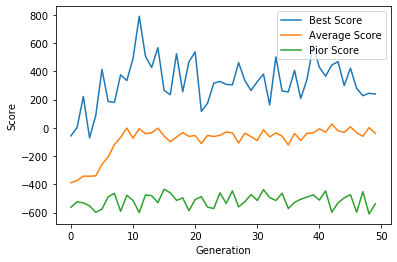

In [7]:
plt.plot(score_best, label="Best Score")
plt.plot(score_aver, label="Average Score")
plt.plot(score_pior, label="Pior Score")
plt.xlabel("Generation")
plt.ylabel("Score")
plt.legend()

print("Melhor individuo", bestInd)

In [8]:
dataFile = open('GAindividual_bestOriginal.txt', 'w')
dataFile.write(str(bestInd))
dataFile.write("\n")
dataFile.close()

!python3 pacman.py -n 10 -l originalClassic -p GAagents --agentArgs "tableMode=Original,f=GAindividual_bestOriginal.txt"


layout:  originalClassic
Pacman died! Score: 302
Pacman died! Score: -169
Pacman died! Score: -223
Pacman died! Score: 525
Pacman died! Score: -224
Pacman died! Score: -261
Pacman died! Score: -200
Pacman died! Score: -233
Pacman died! Score: -183
Pacman died! Score: -57
Average Score: -72.3
Scores:        302.0, -169.0, -223.0, 525.0, -224.0, -261.0, -200.0, -233.0, -183.0, -57.0
Win Rate:      0/10 (0.00)
Record:        Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss


In [9]:

GA_resultScoreOriginal = [302.0, -169.0, -223.0, 525.0, -224.0, -261.0, -200.0, -233.0, -183.0, -57.0]
GA_resultAvrScoreOriginal = -72.3

## REINFORCEMENT LEARNING


## RESULTADOS

In [48]:
nameFile = "GAindividual.txt"

with open(nameFile, 'w') as f:
    f.write(str(bestInd))
    f.write("\n")

In [105]:
p = !python3 pacman.py -n 1 -l smallClassic -p GAagents --agentArgs "tableMode=Small,f=GAindividual.txt"
p

['layout:  smallClassic',
 "[0, 'd2', 'd1', 2, 2, 'a3', 'a2', 'a1']",
 'Pacman died! Score: -468',
 'Average Score: -468.0',
 'Scores:        -468.0',
 'Win Rate:      0/1 (0.00)',
 'Record:        Loss']